In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

plt.rcParams["figure.figsize"] = (20,10)
sns.set(rc={'figure.figsize':(20,10)})

pd.set_option('display.max_columns', None)
display.max_rows = 10

In [2]:
players = pd.read_csv(r'project_data\players.csv')
players_salary = pd.read_csv(r'project_data\players_salary.csv')
teams = pd.read_csv(r'project_data\teams.csv')
teams_salary = pd.read_csv(r'project_data\teams_salary.csv')
teams_average = pd.read_csv(r'project_data\teams_average.csv')
players_average = pd.read_csv(r'project_data\players_average.csv')

In [3]:
teams_average.drop(index=0, columns='Unnamed: 0', inplace=True)
teams_average.rename(columns={'year_ID': 'year_ID', 'salary_x': 'salary_mean',
                     'salary_x.1': 'salary_std', 'salary_x.2': 'salary_median'}, inplace=True)
teams_average.reset_index(drop=True, inplace=True)
teams_average = teams_average.astype(float)

players_average.drop(index=0, columns='Unnamed: 0', inplace=True)
players_average.rename(columns={'year_ID': 'year_ID', 'salary_x': 'salary_mean',
                       'salary_x.1': 'salary_std', 'salary_x.2': 'salary_median',
                       'aggregated_salary': 'agg_mean', 'aggregated_salary.1': 'agg_std', 'aggregated_salary.2': 'agg_median'}, inplace=True)
players_average.reset_index(drop=True, inplace=True)
players_average = players_average.astype(float)

### Salary Standard Deviation Distributions

Salary Standard Deviation is used to see whether the distribution of how teams pay their players matters towards their success. A high std would suggest a team that is highly paying a few players, and has many on minimal salary. Compared to a lower std where most of the players on the team make the same amount. Additionally, in latter plots I am looking at between 1.2 to 1.6 team salary_plus. Within this range, around half teams make the payoffs (see presentation.ipynb), so it is a good sample to see what differentiates the teams that do and do not.

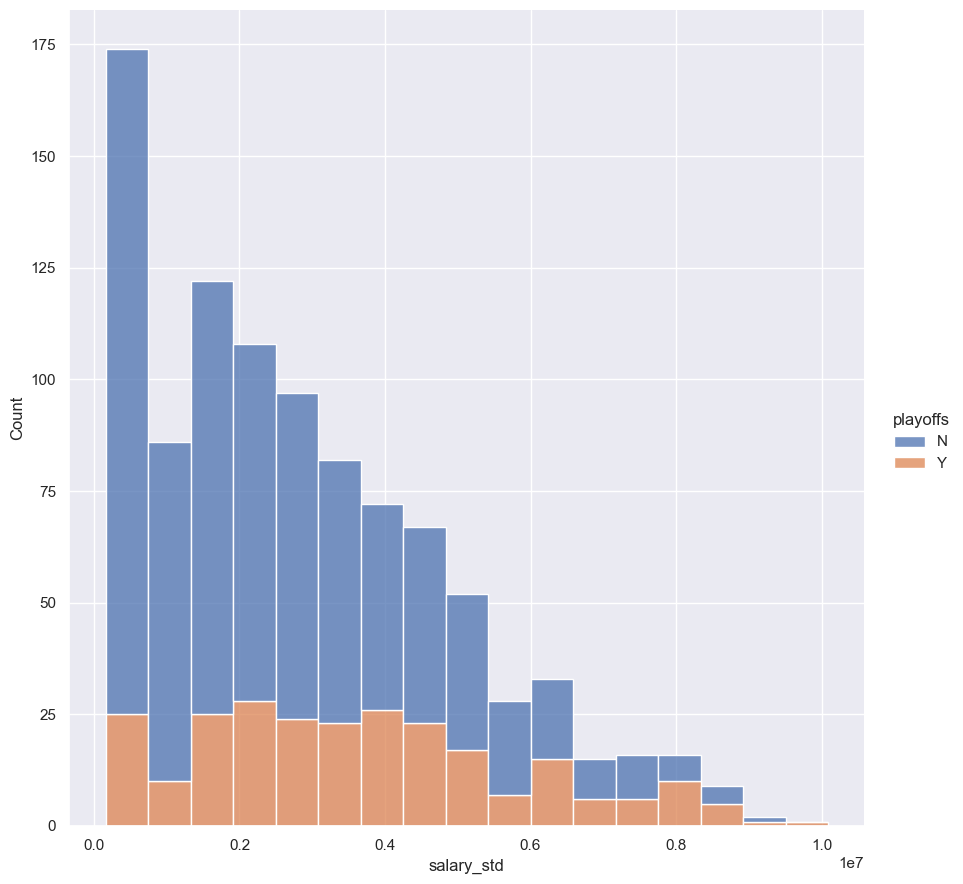

In [4]:
sns.displot(x=teams['salary_std']
            ,hue=teams['playoffs']
            ,multiple='stack'
            #, kind='kde'
            , height = 9
            )

In [5]:
upper_middle_teams = teams[(teams['salary_plus'] > 1.2) & (teams['salary_plus'] < 1.6)]

In [6]:
len(upper_middle_teams)

211

Text(0.5, 1.0, 'Density of Salary_STD for Teams 1.2 < Salary_Plus < 1.6')

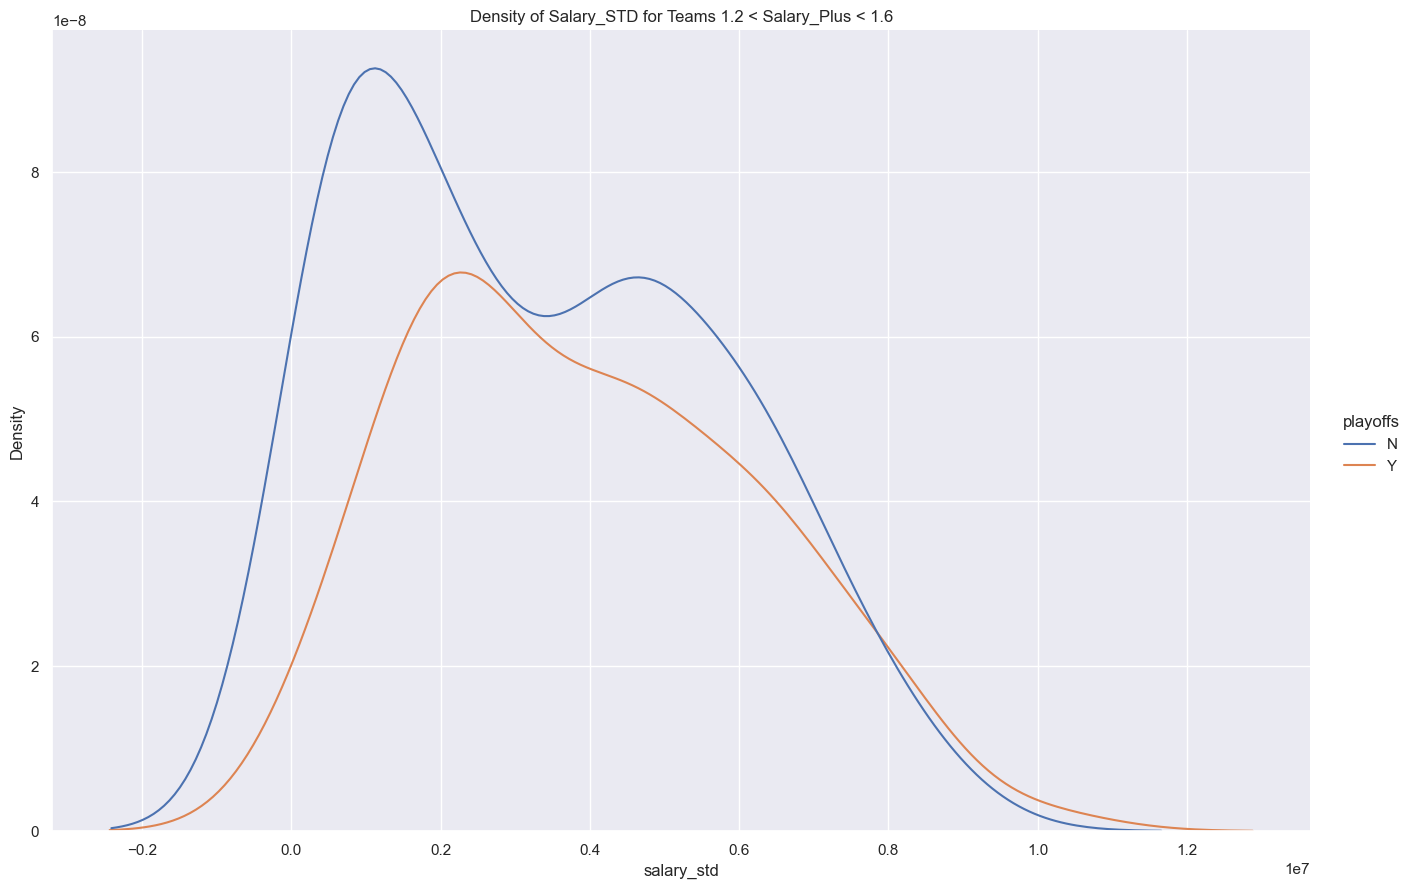

In [7]:
sns.displot(x=upper_middle_teams['salary_std']
             ,hue=upper_middle_teams['playoffs']
             ,multiple='layer'
            , kind='kde'
            ,height = 9
            ,aspect=1.5
            )
plt.title('Density of Salary_STD for Teams 1.2 < Salary_Plus < 1.6')

Text(0.5, 1.0, 'Density of Salary_STD for Playoff Teams 1.2 < Salary_Plus < 1.6')

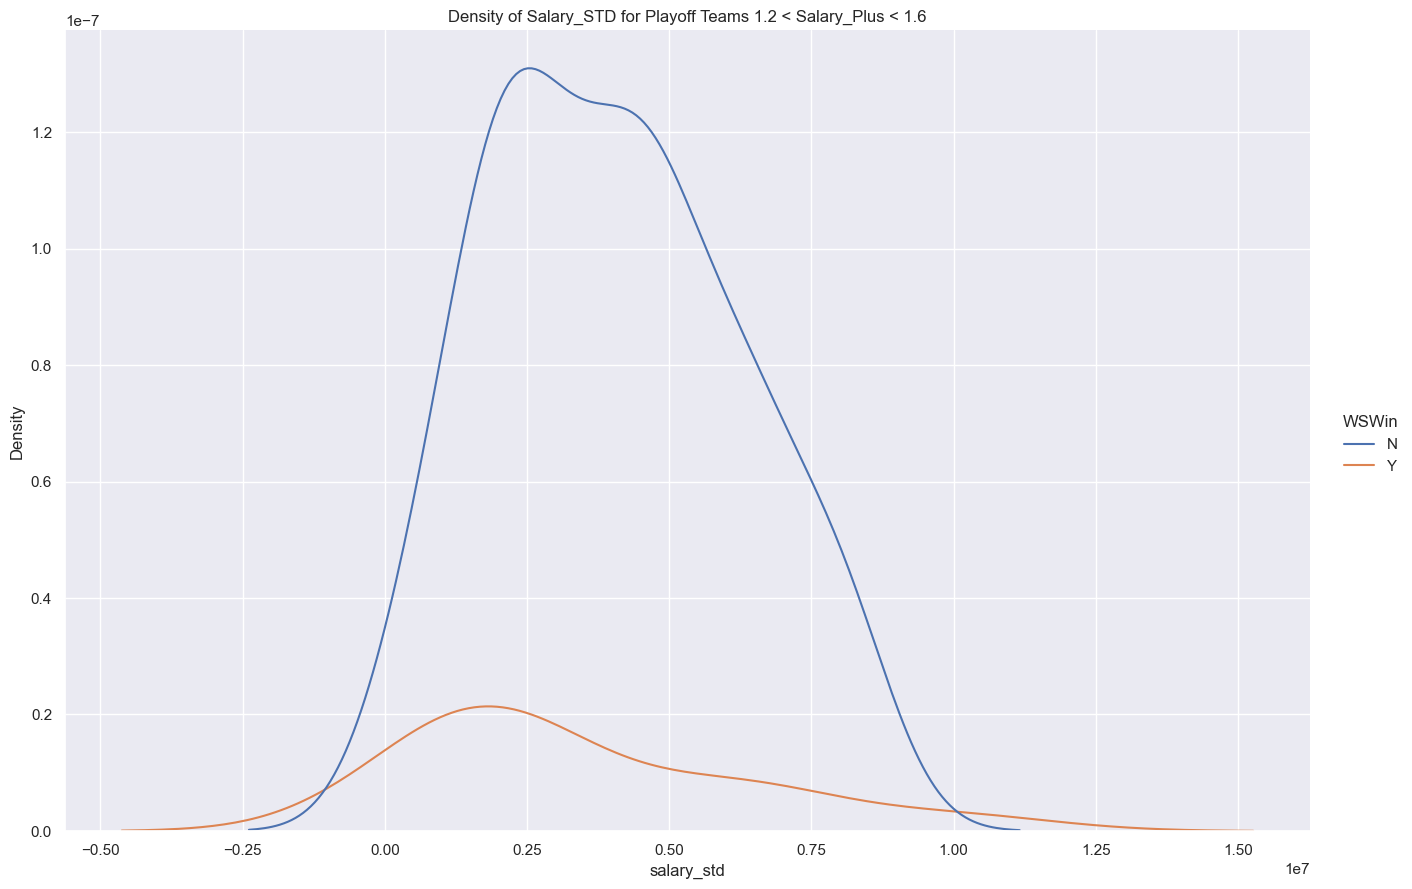

In [8]:
sns.displot(x = upper_middle_teams[upper_middle_teams['playoffs'] == 'Y']['salary_std']
            ,hue=teams['WSWin']
            ,kind='kde'
             ,height = 9
            ,aspect=1.5
            )

plt.title('Density of Salary_STD for Playoff Teams 1.2 < Salary_Plus < 1.6')

### Individual Team Salary Distributions

Showing the top 15 salaried players from each team and year, splitting between playoff teams and not. These plots are narratively strong, showing the difference in salary distributions between playoff and non-playoff teams for the same years, as well as showing what team won the World Series that year. 

In [9]:
players_salary_sort = players.sort_values('aggregated_salary_plus',ascending=False).groupby(['year_ID','franchID']).head(15)
players_use = players_salary_sort[(players_salary_sort['playoffs'] == 'Y') & (players_salary_sort['year_ID'] == 2004)]
players_use2 = players_salary_sort[(players_salary_sort['playoffs'] == 'N') & (players_salary_sort['year_ID'] == 2004)]

print(max([max(players_use['aggregated_salary_plus']),max(players_use2['aggregated_salary_plus'])]))

11.552986165900371


c:\Users\sithl\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


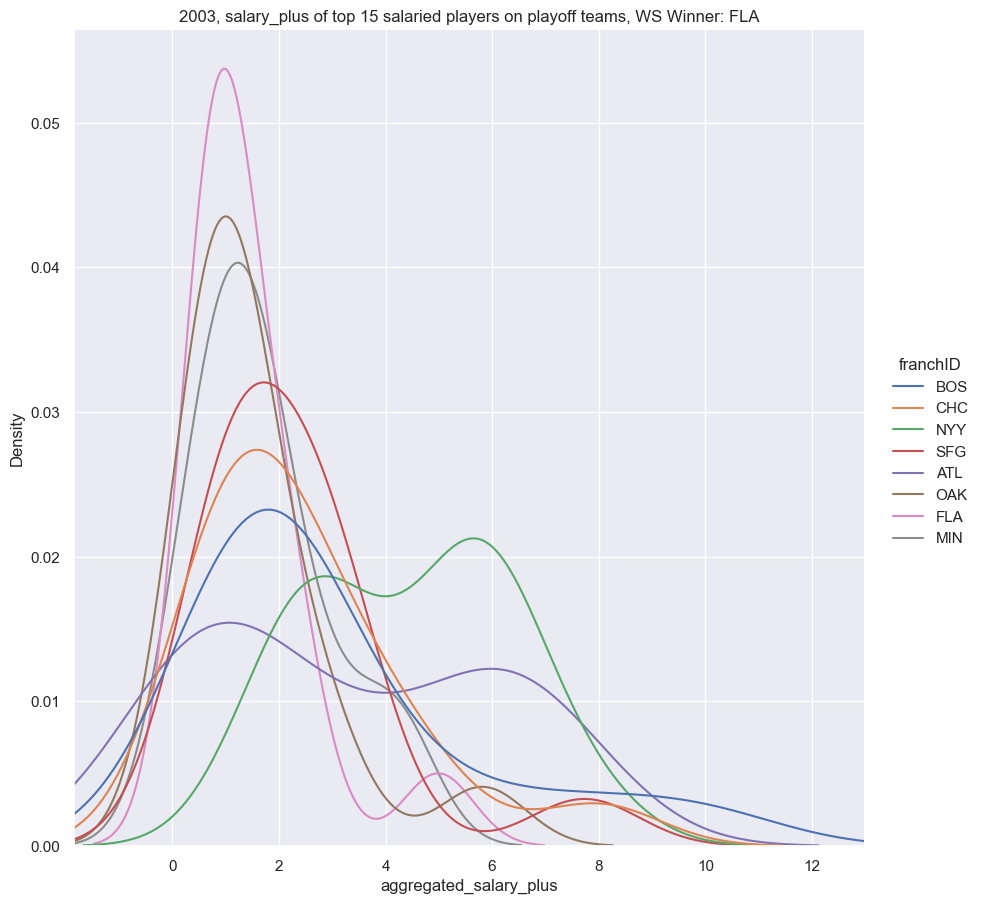

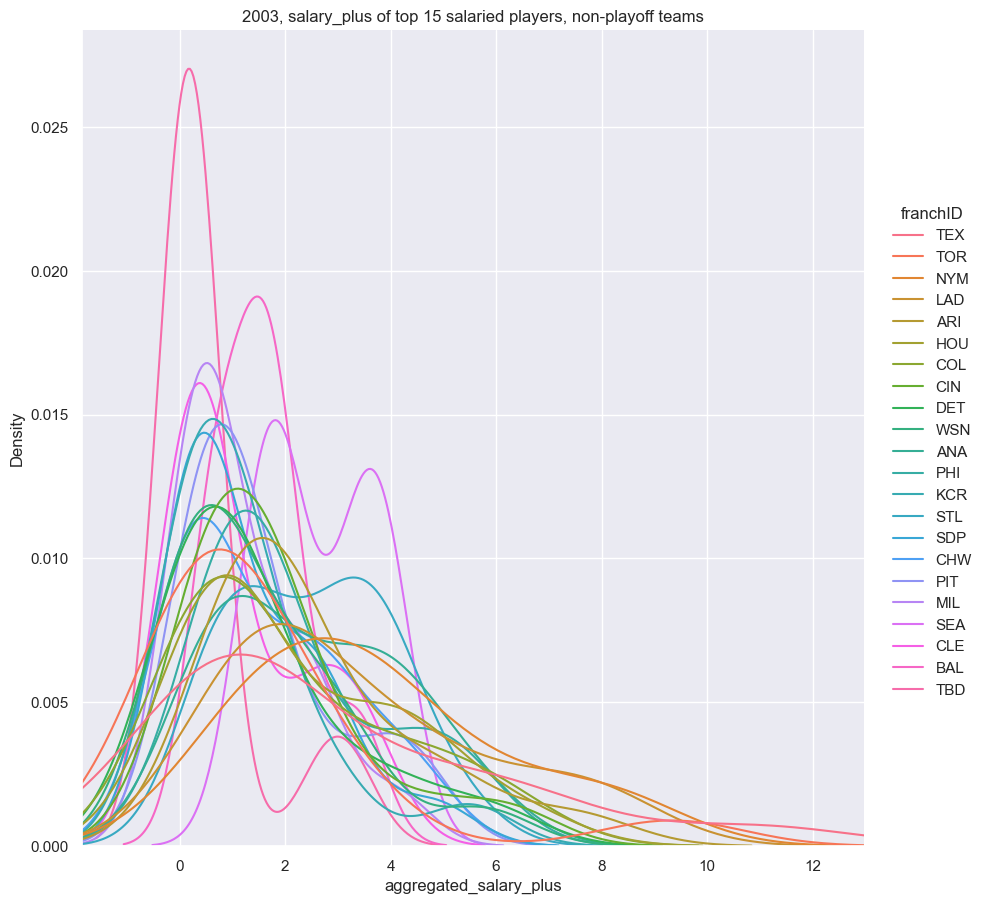

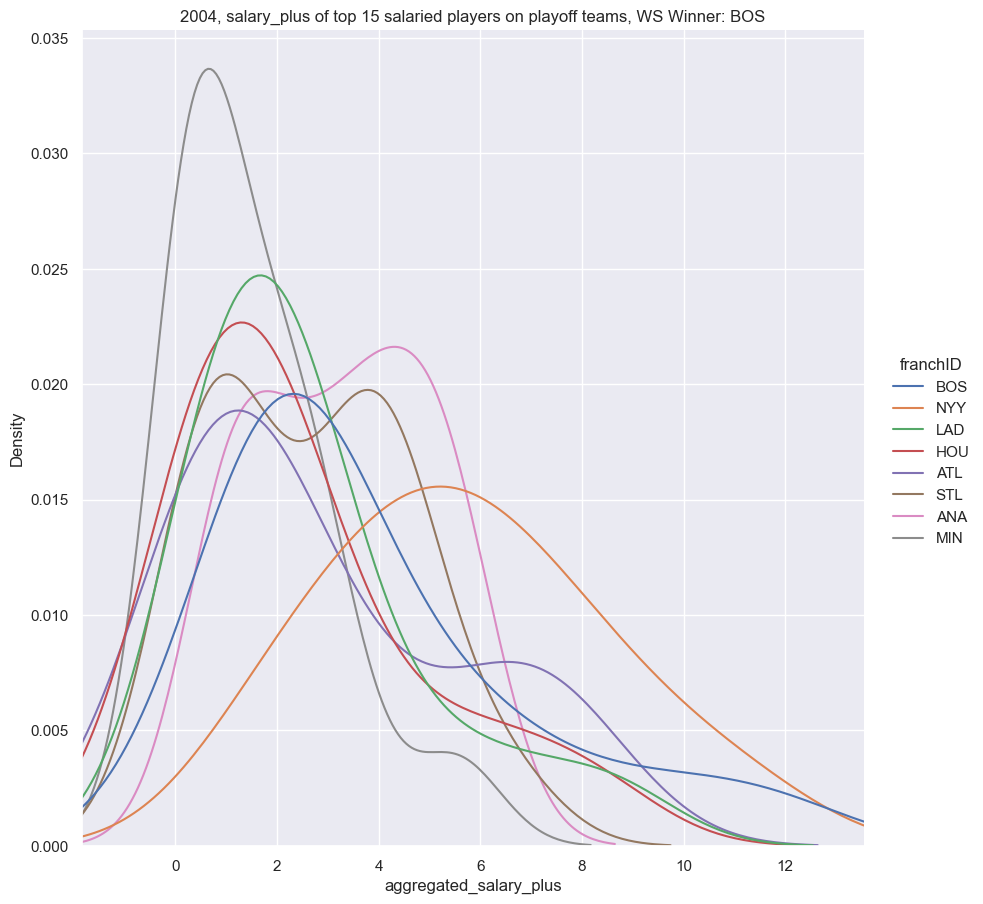

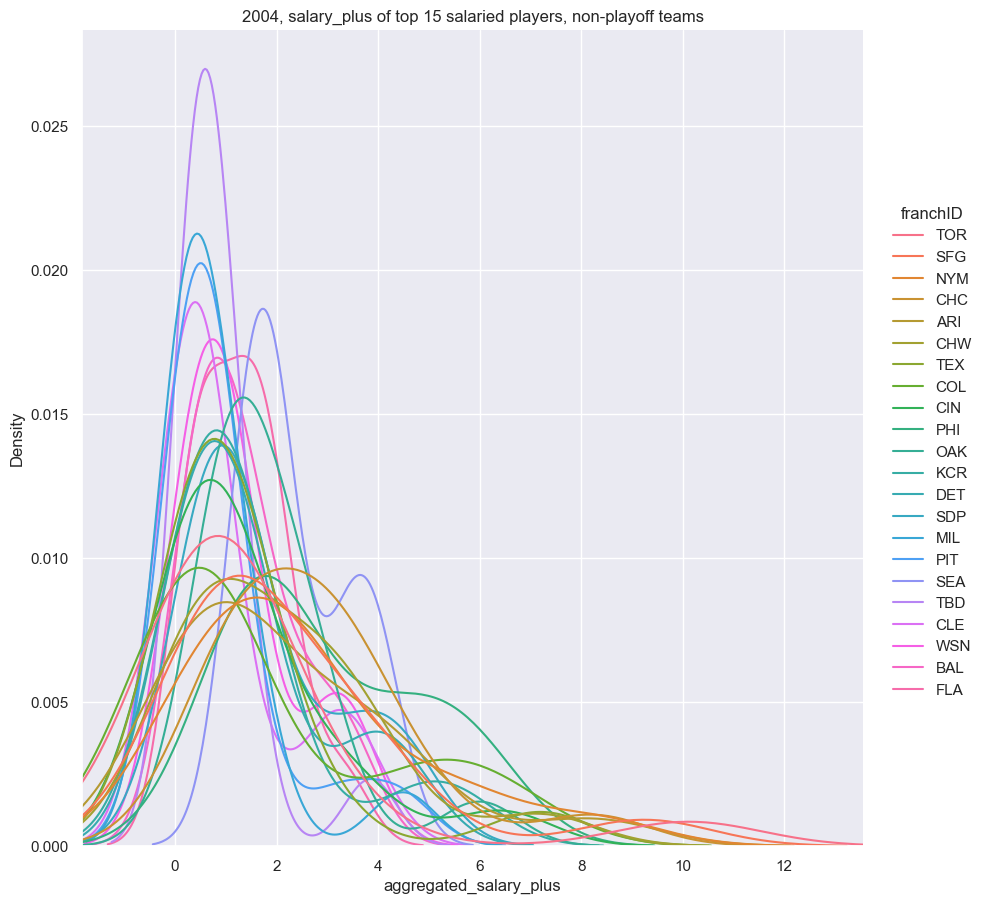

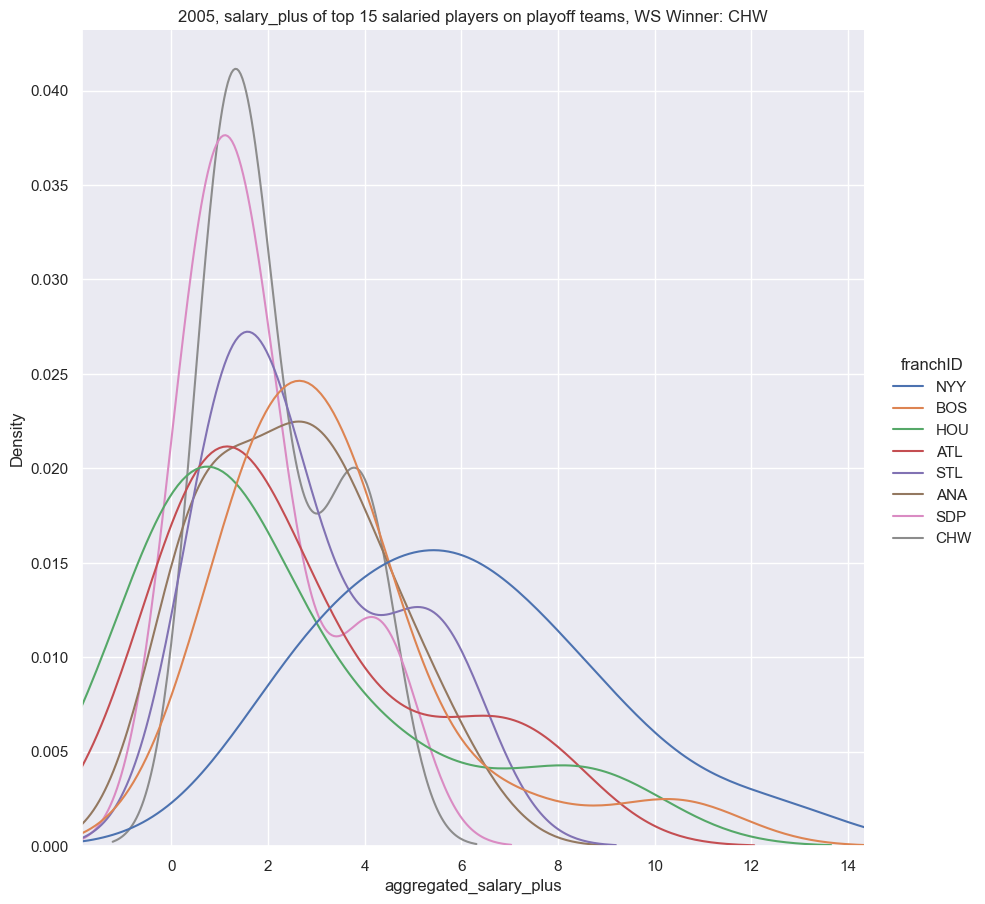

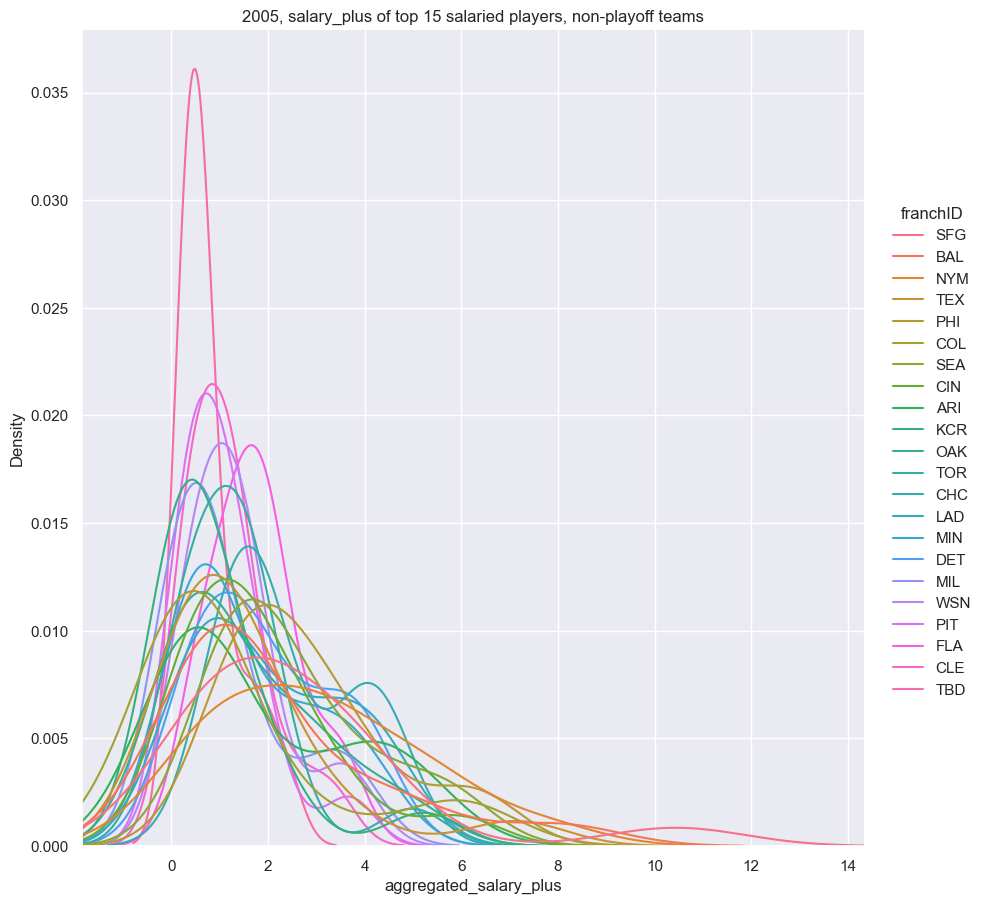

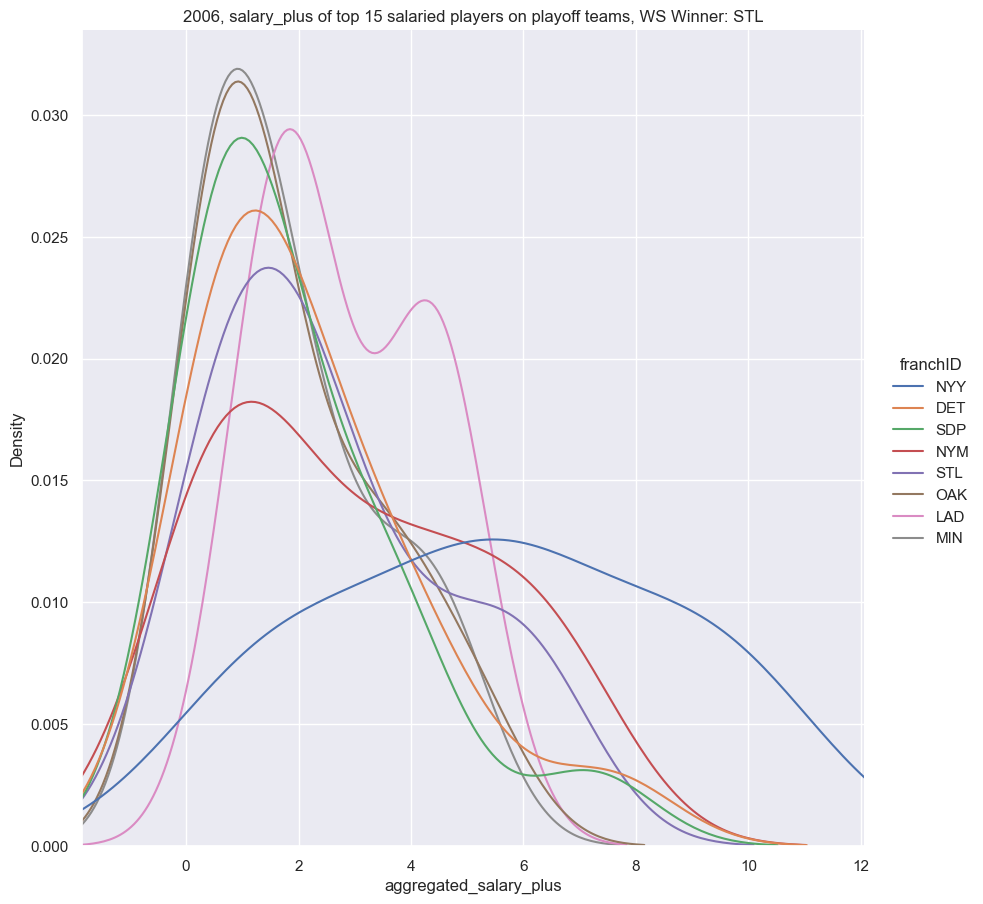

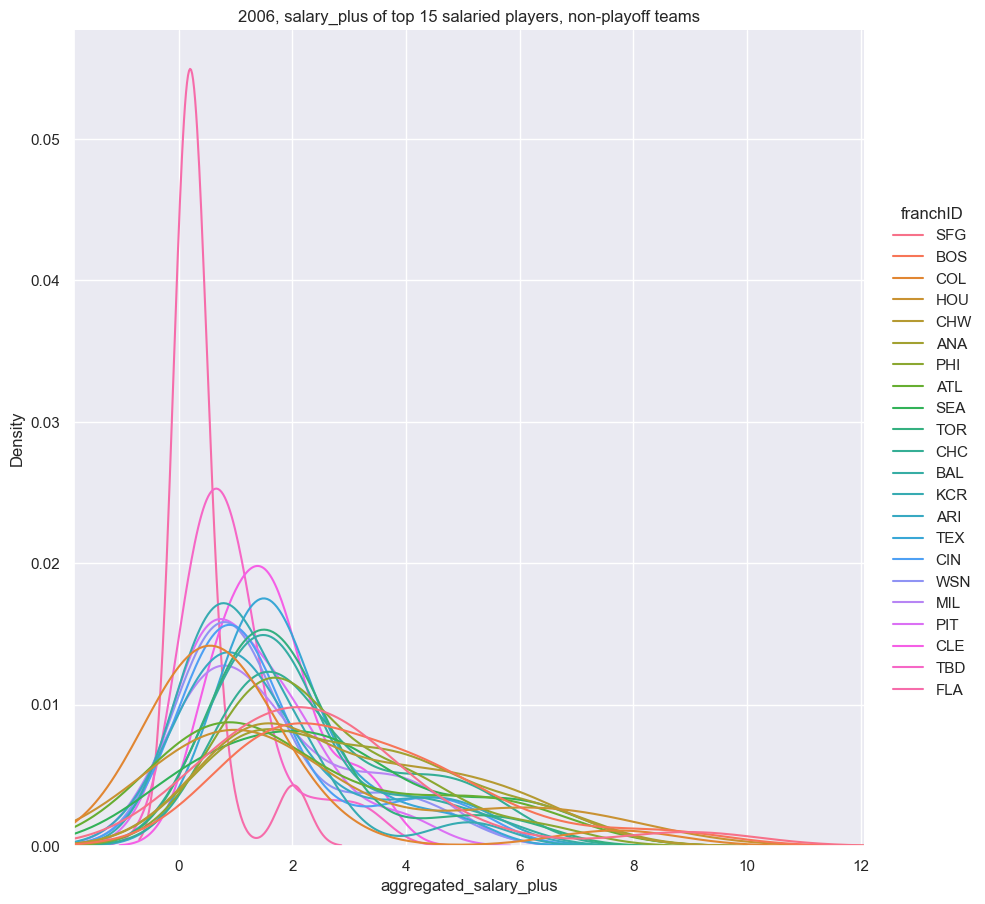

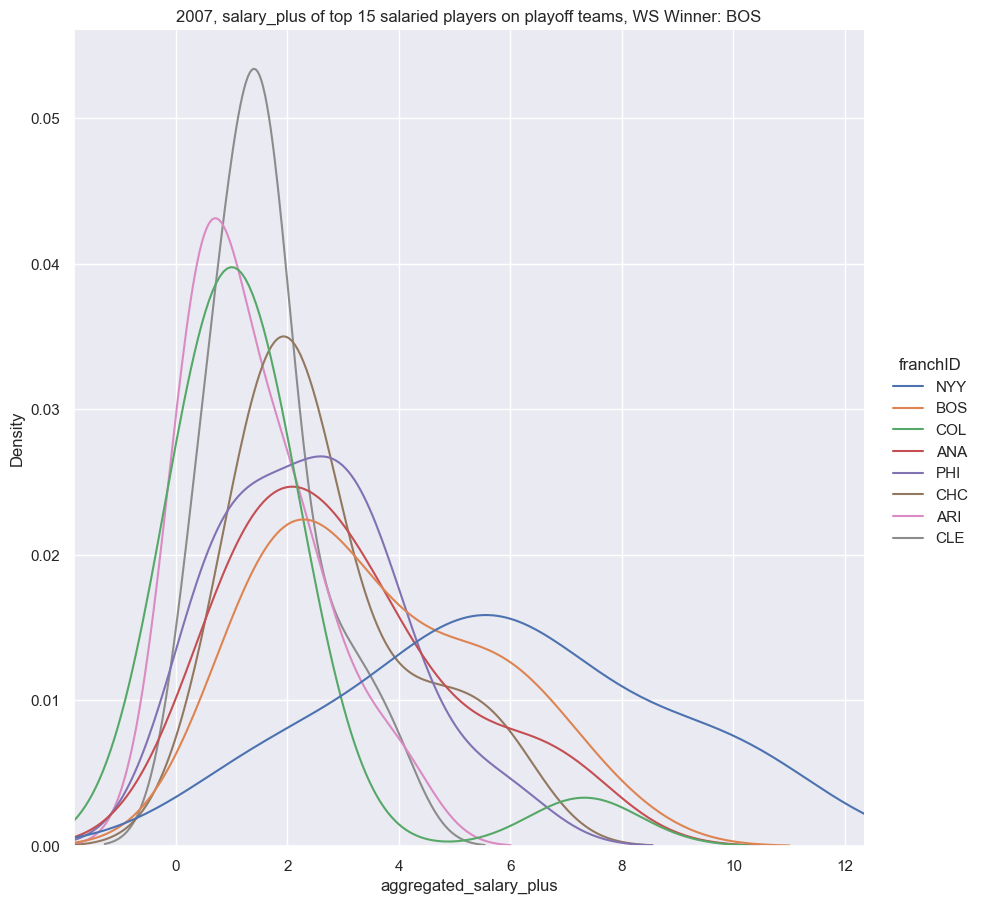

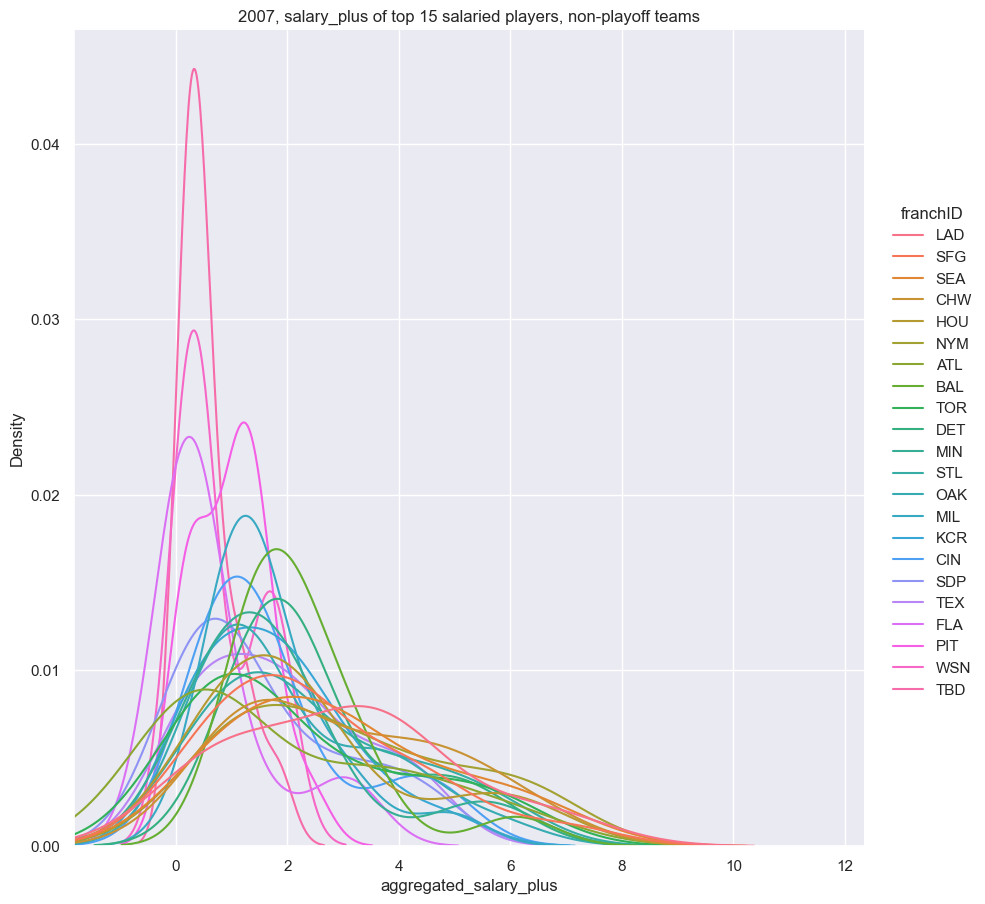

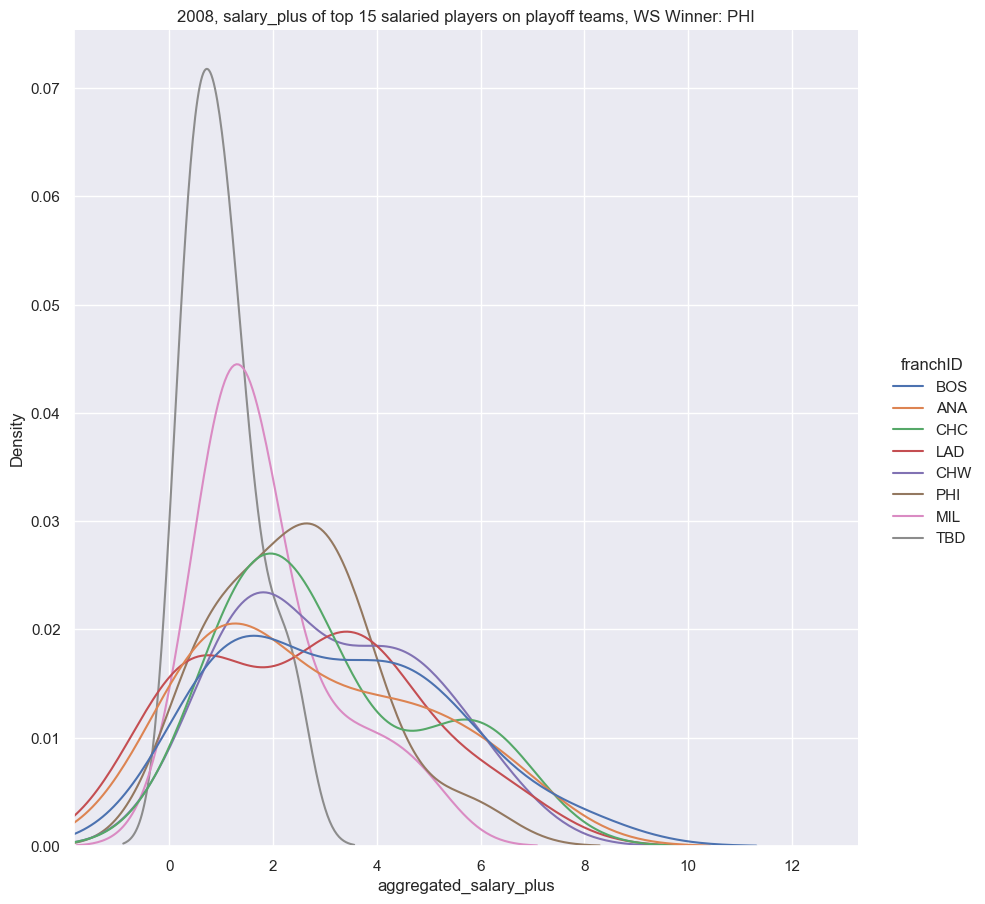

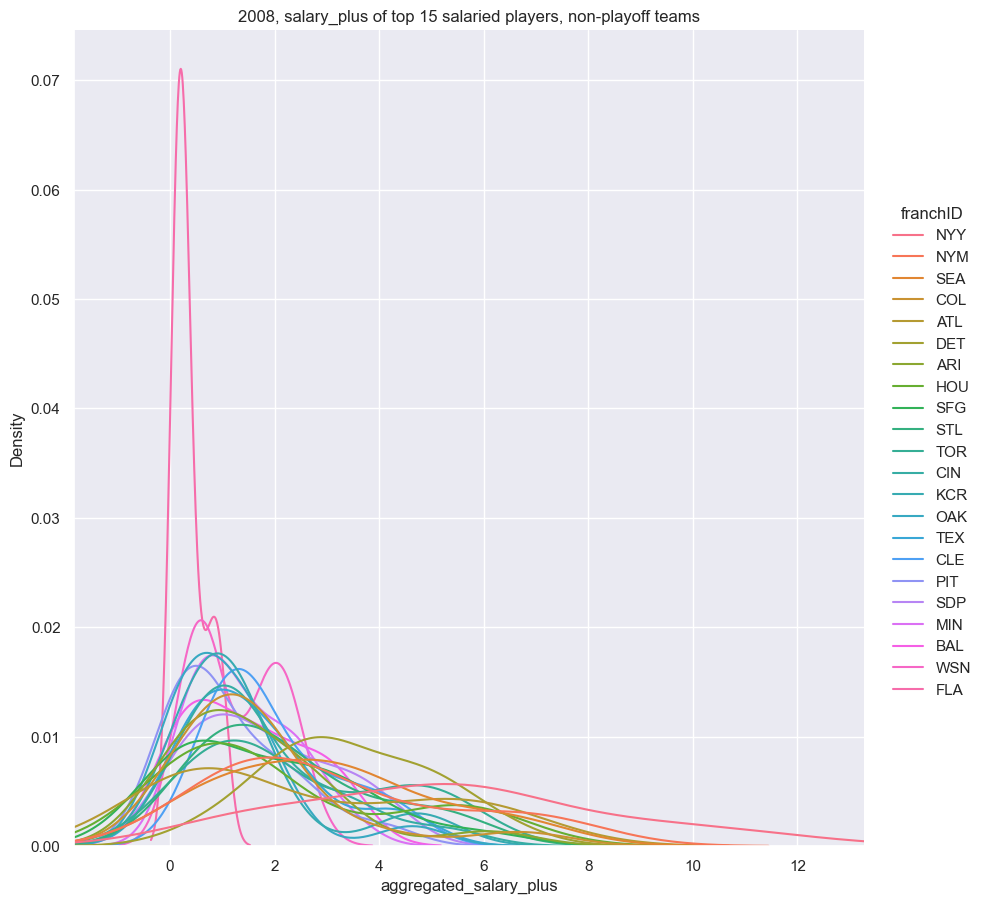

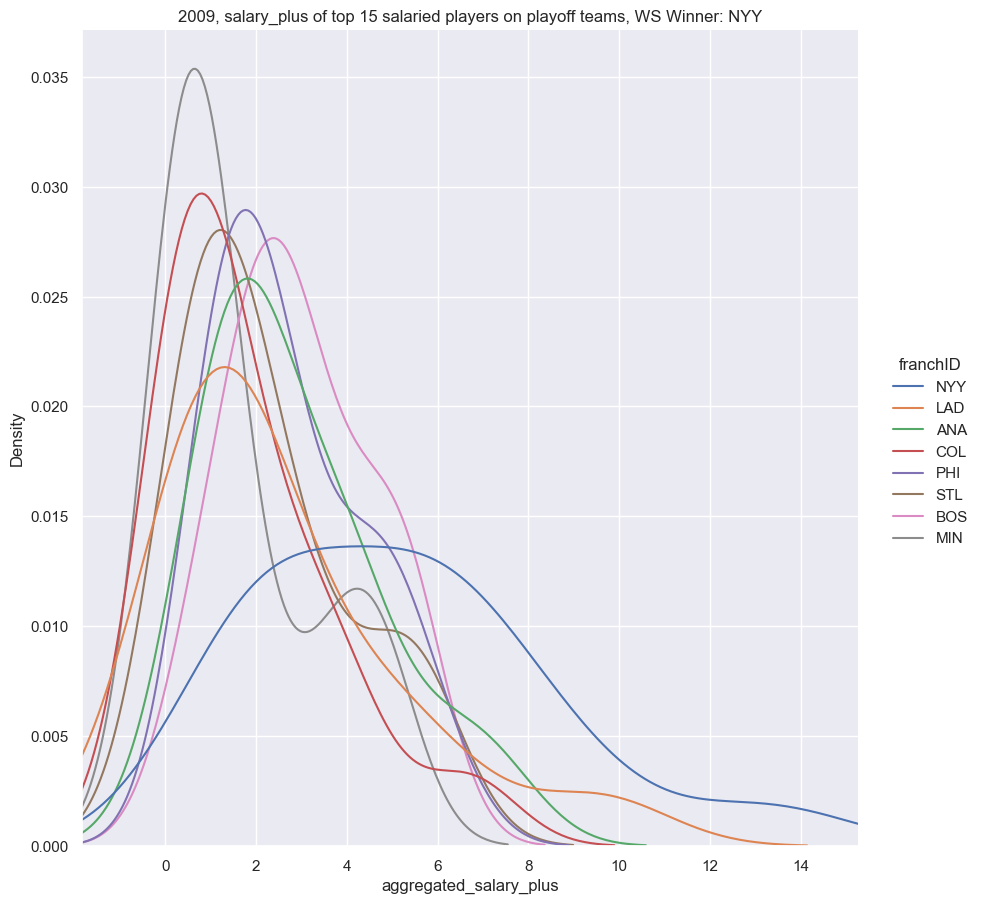

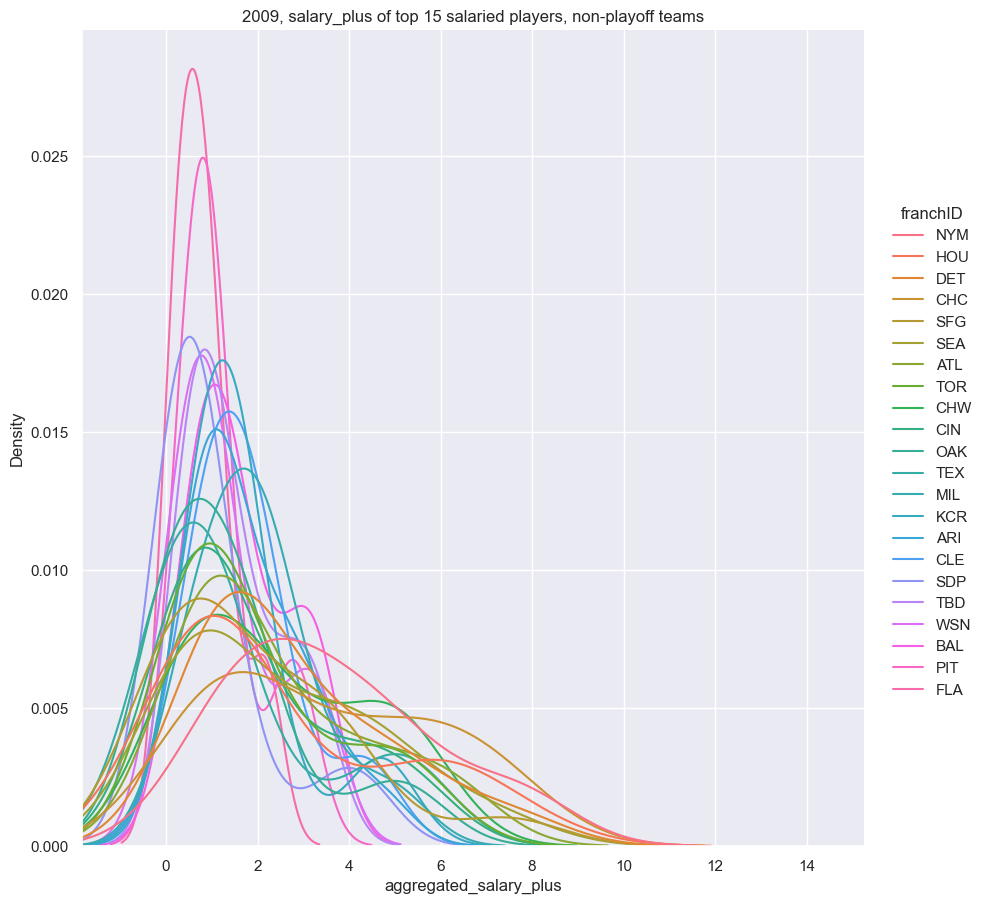

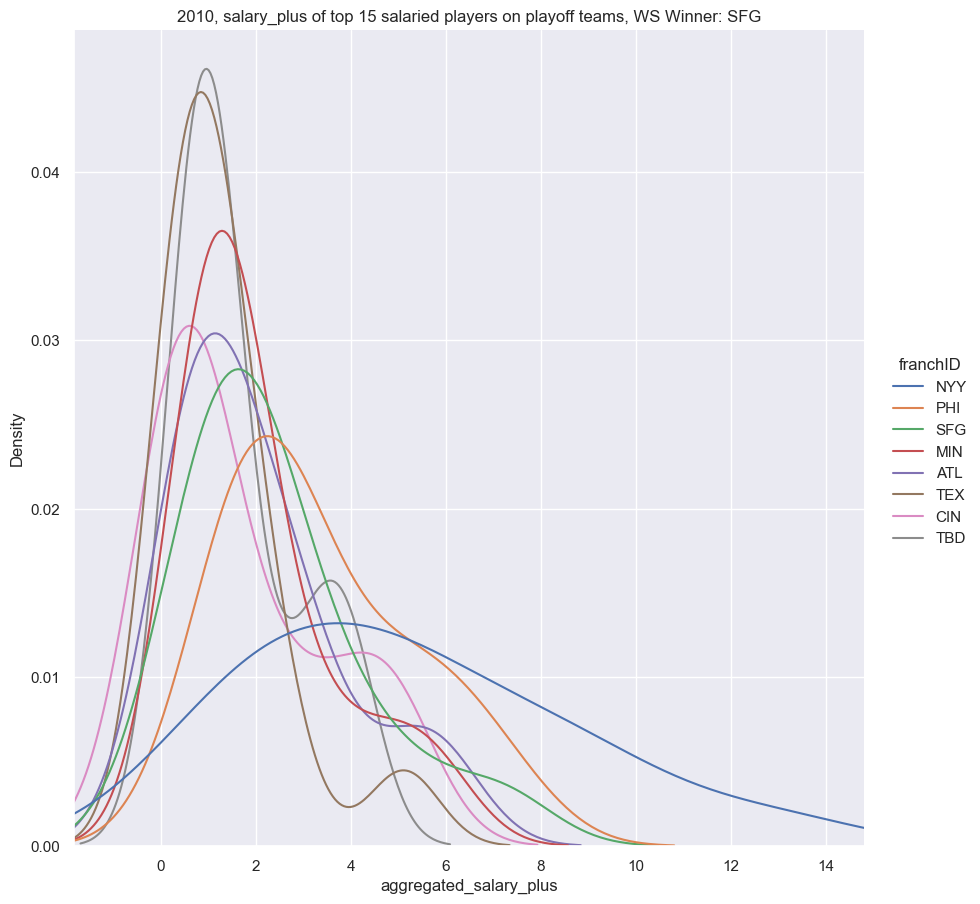

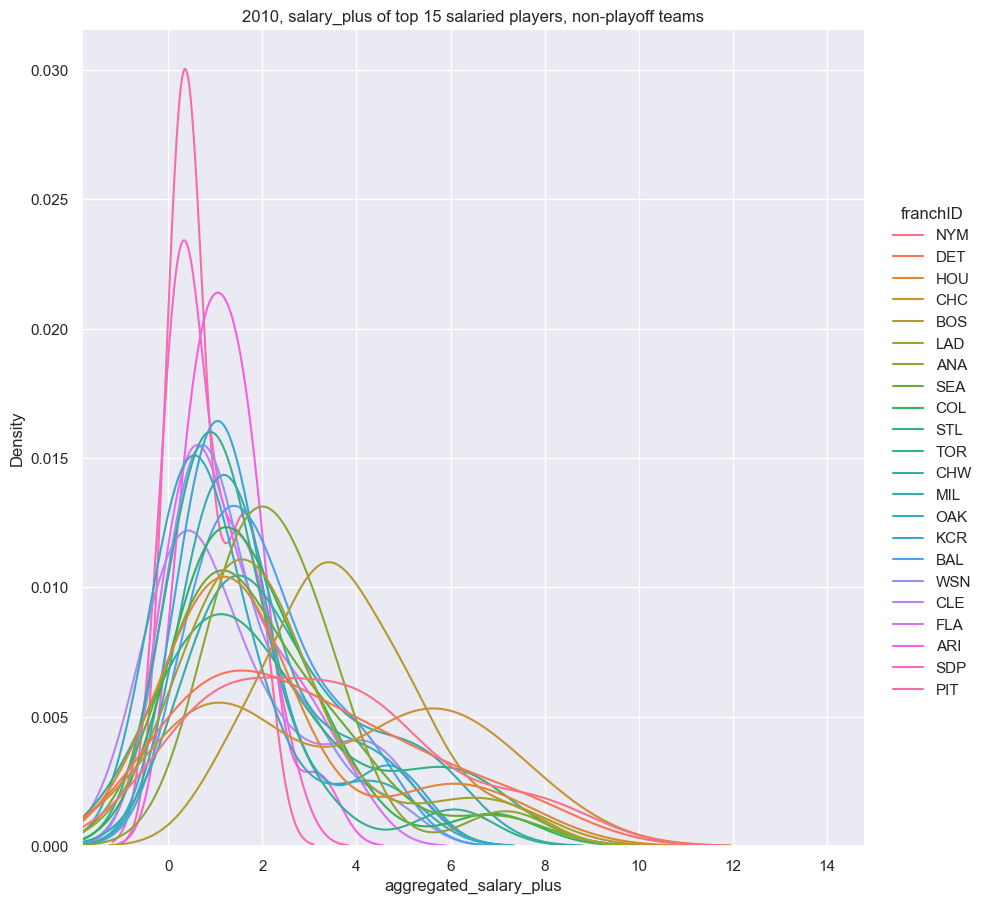

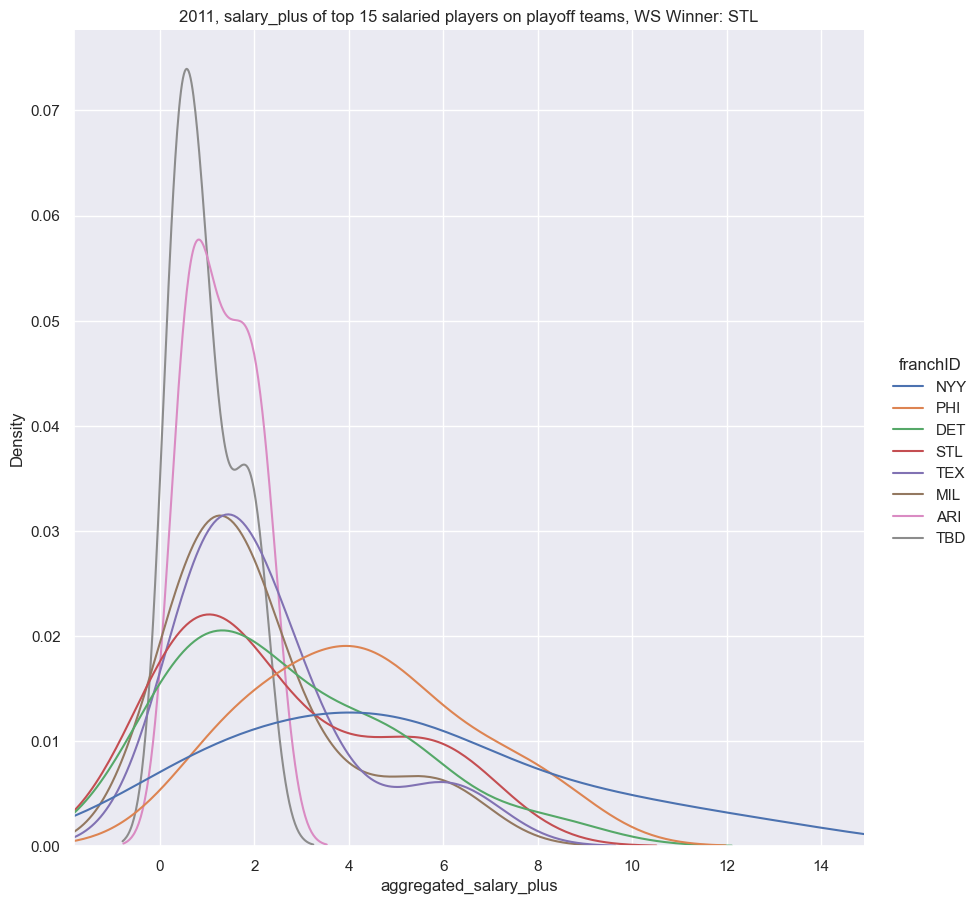

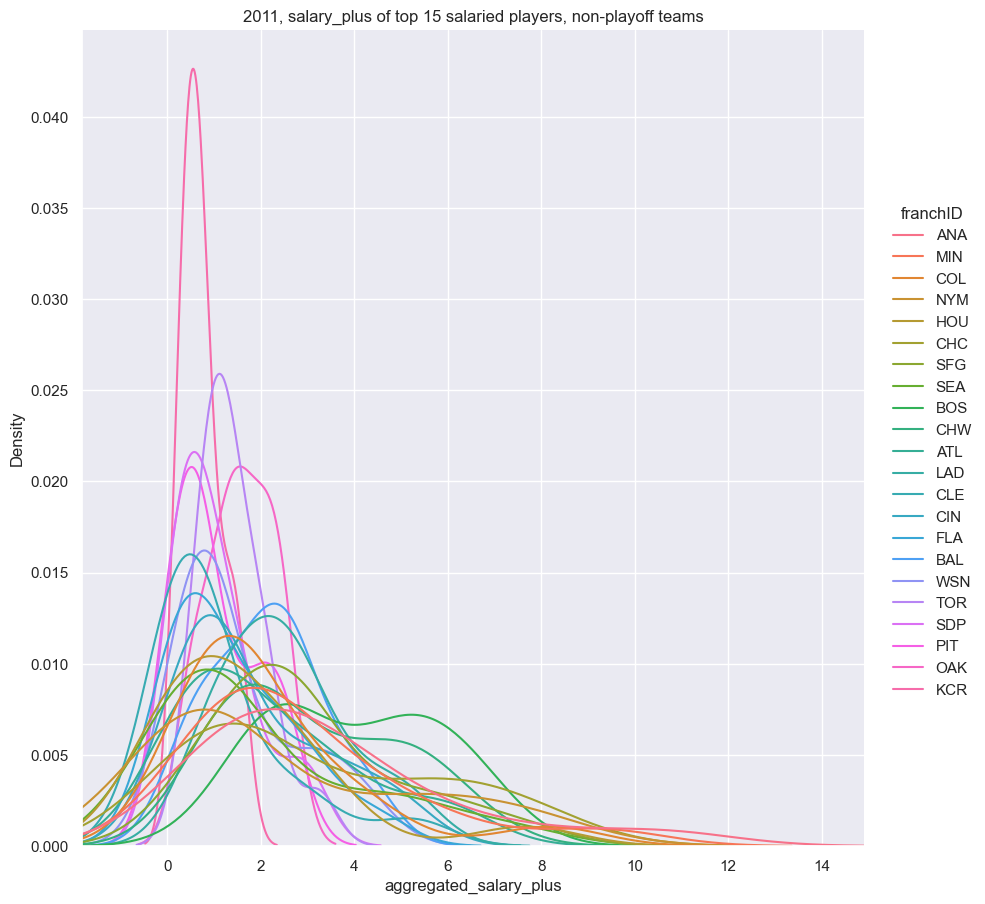

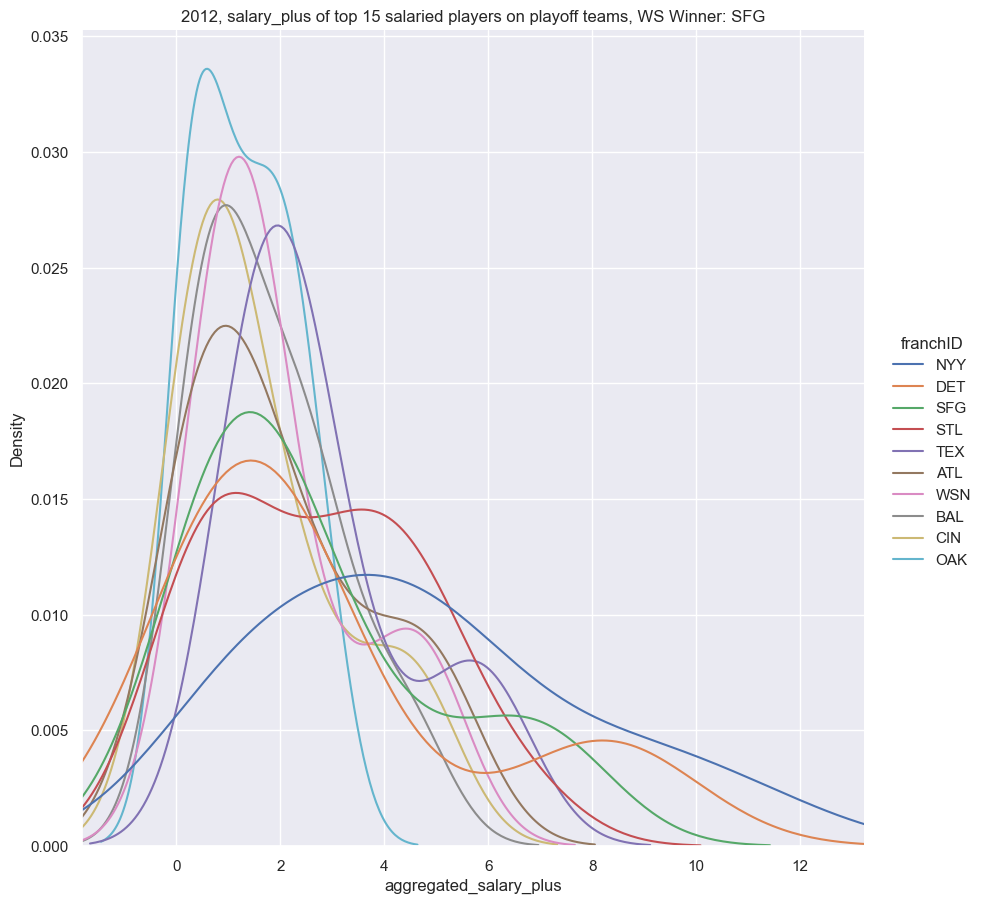

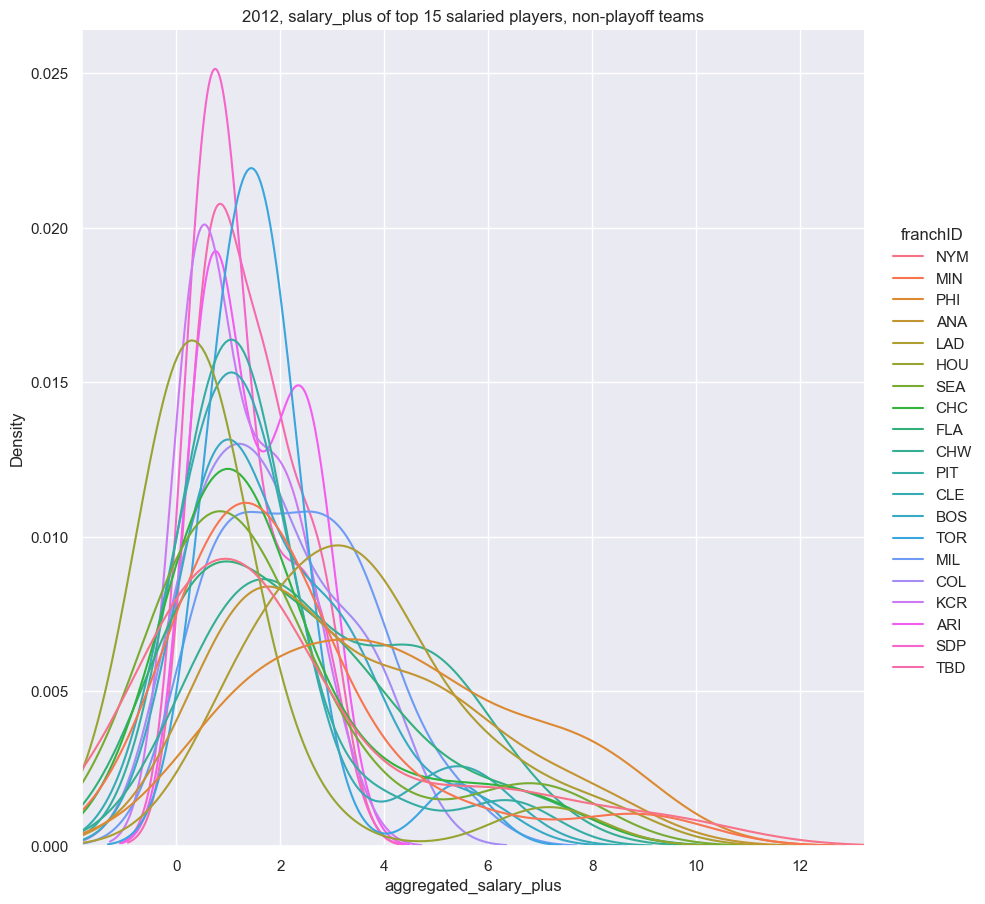

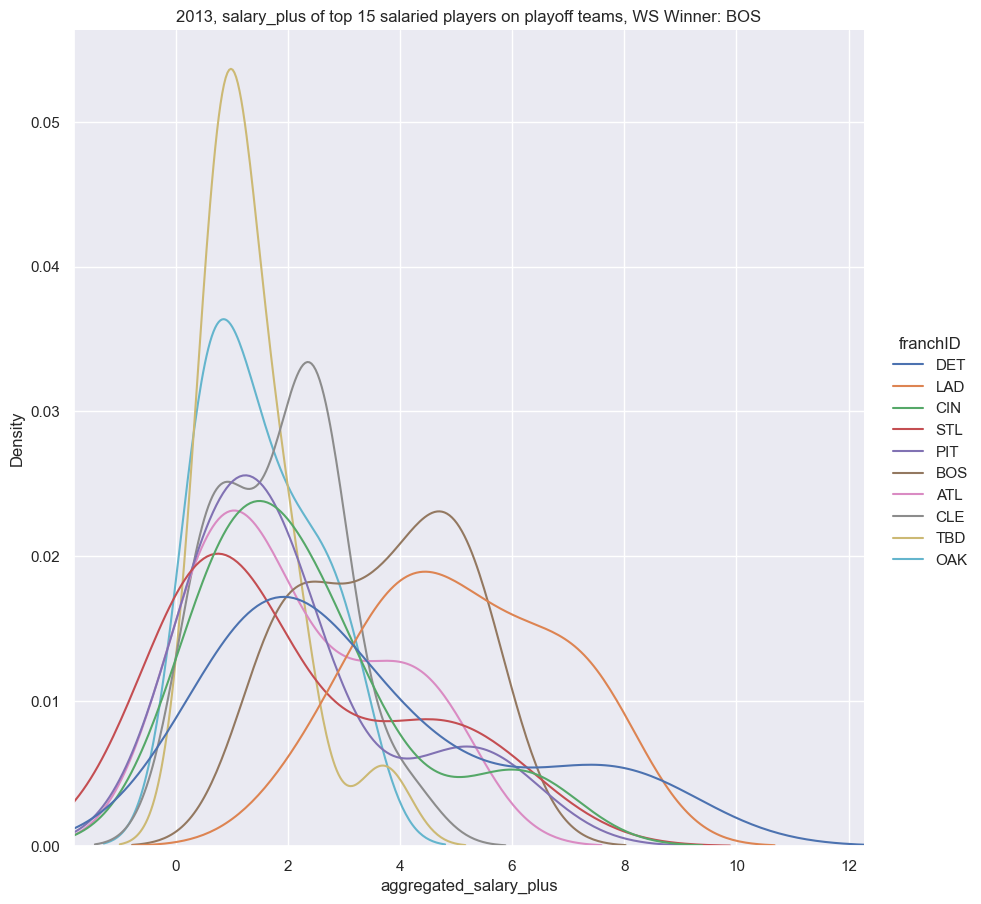

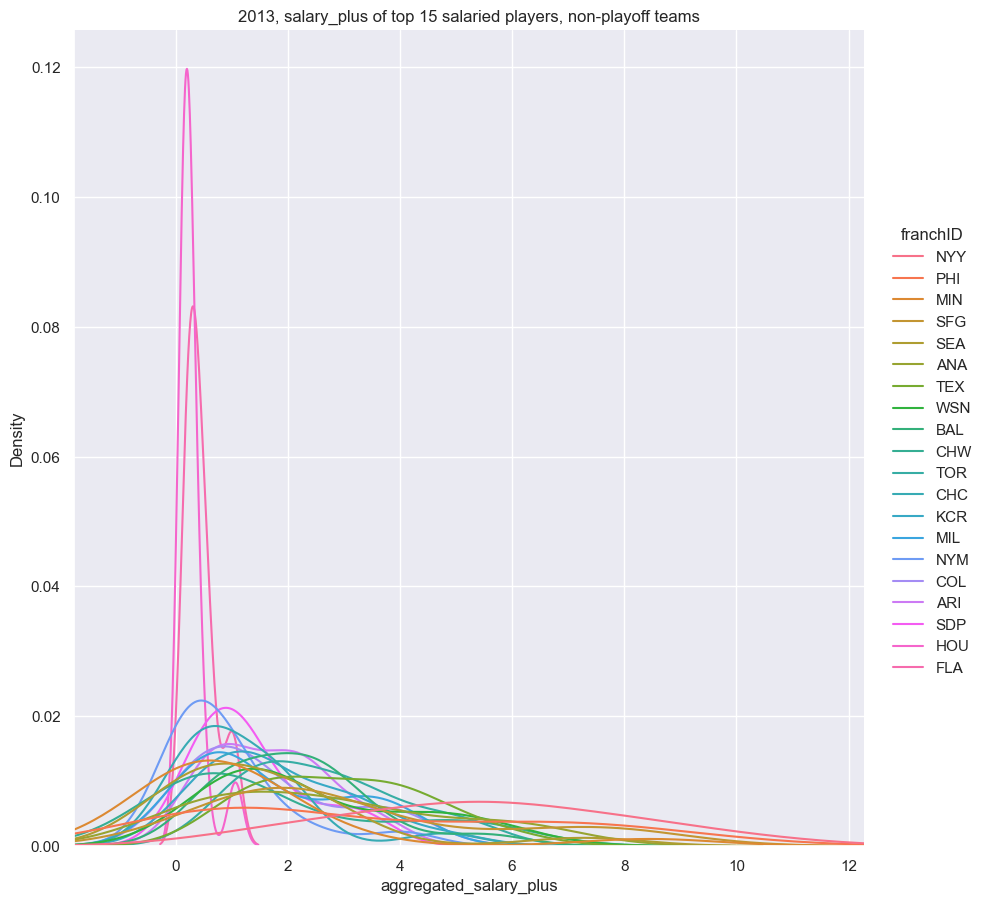

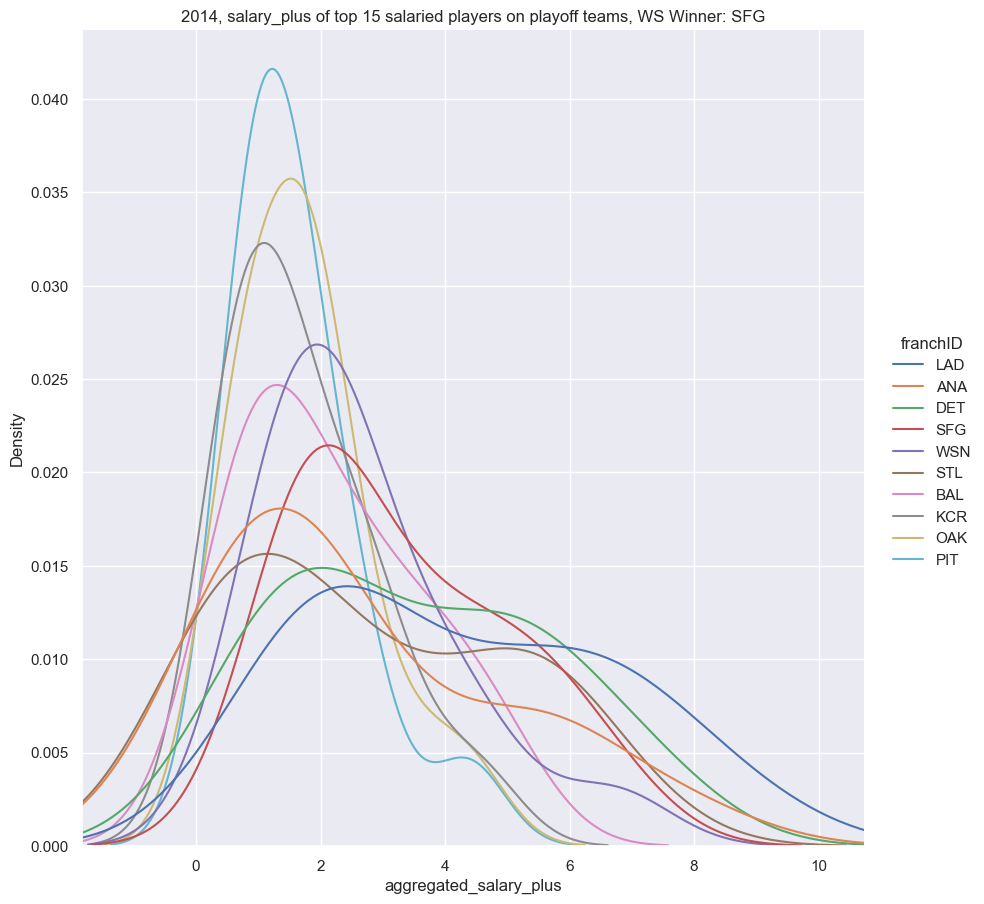

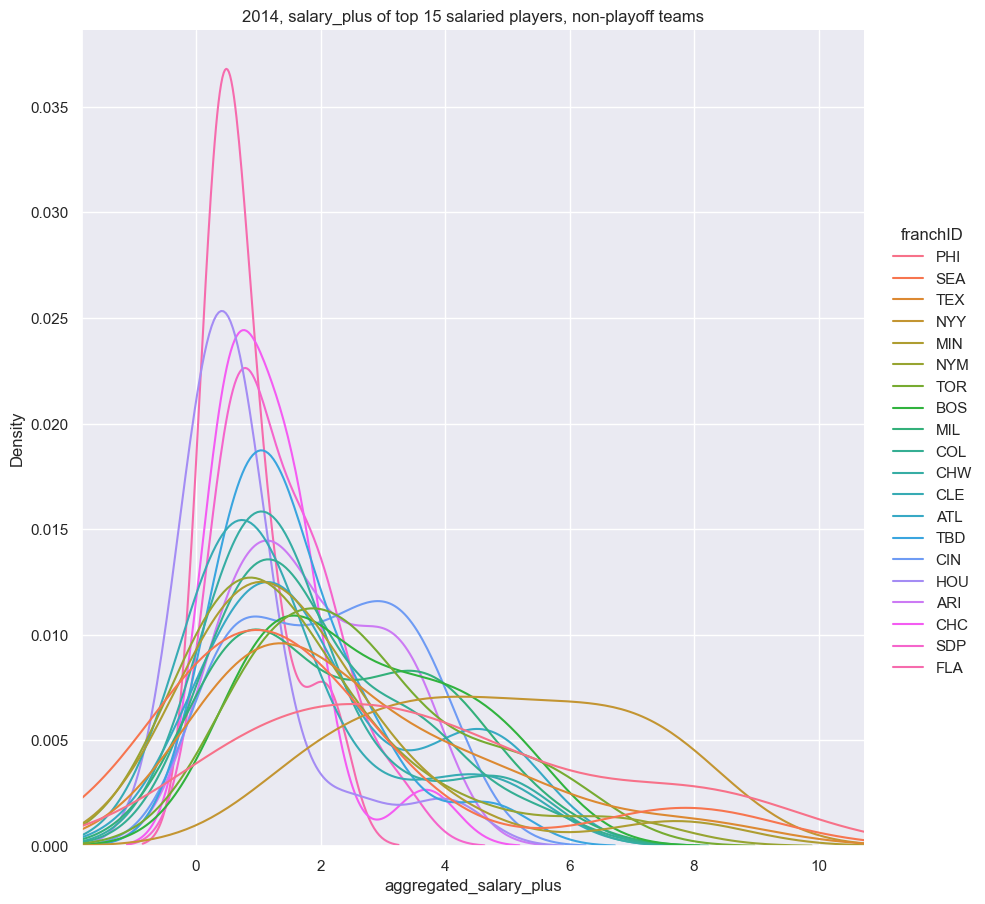

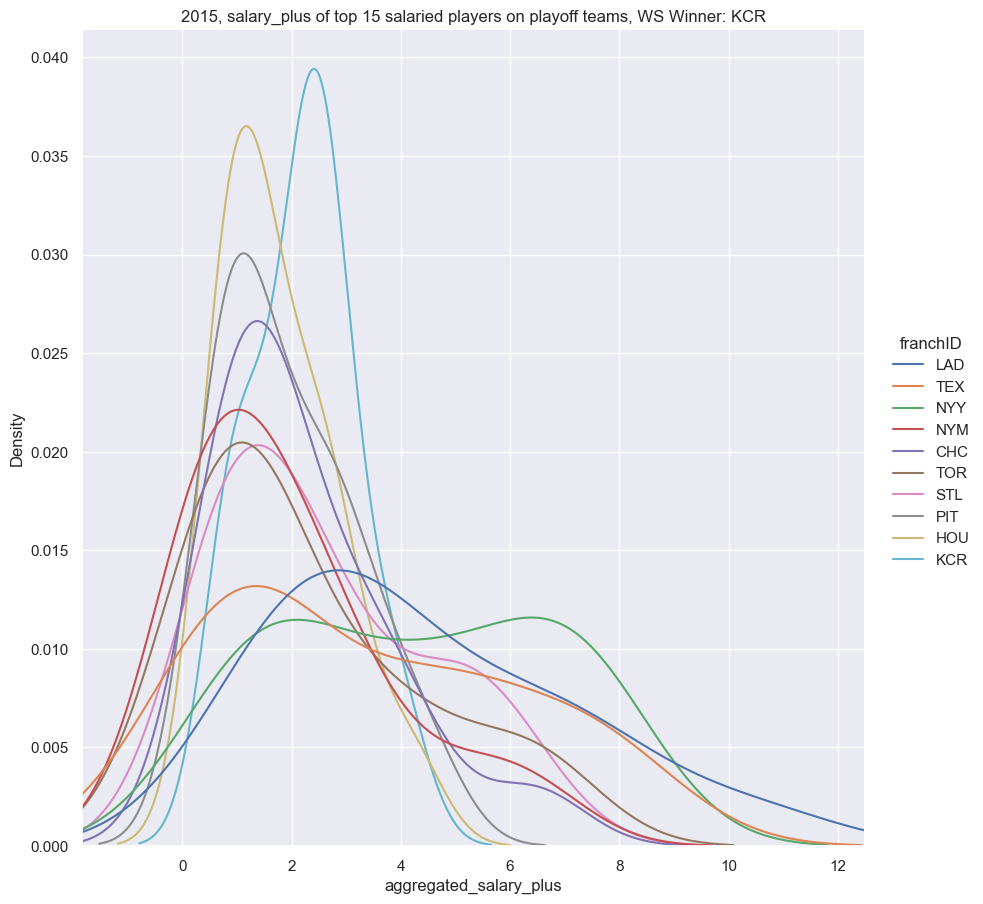

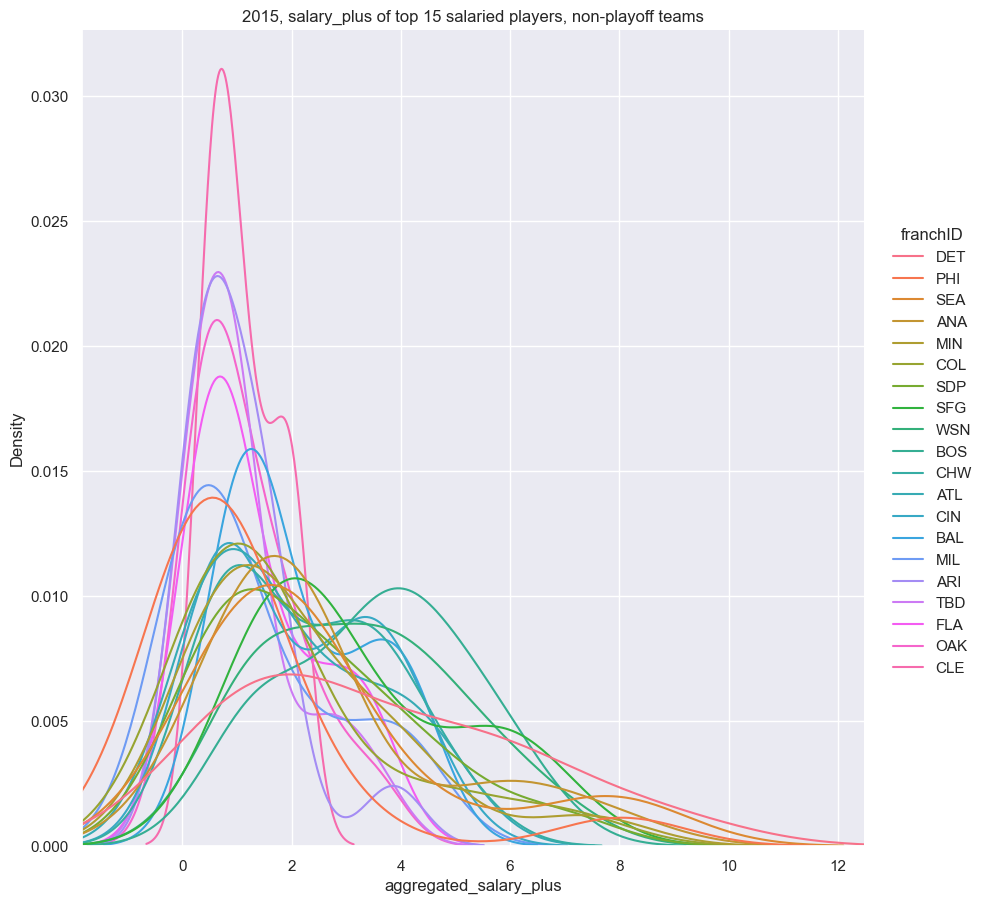

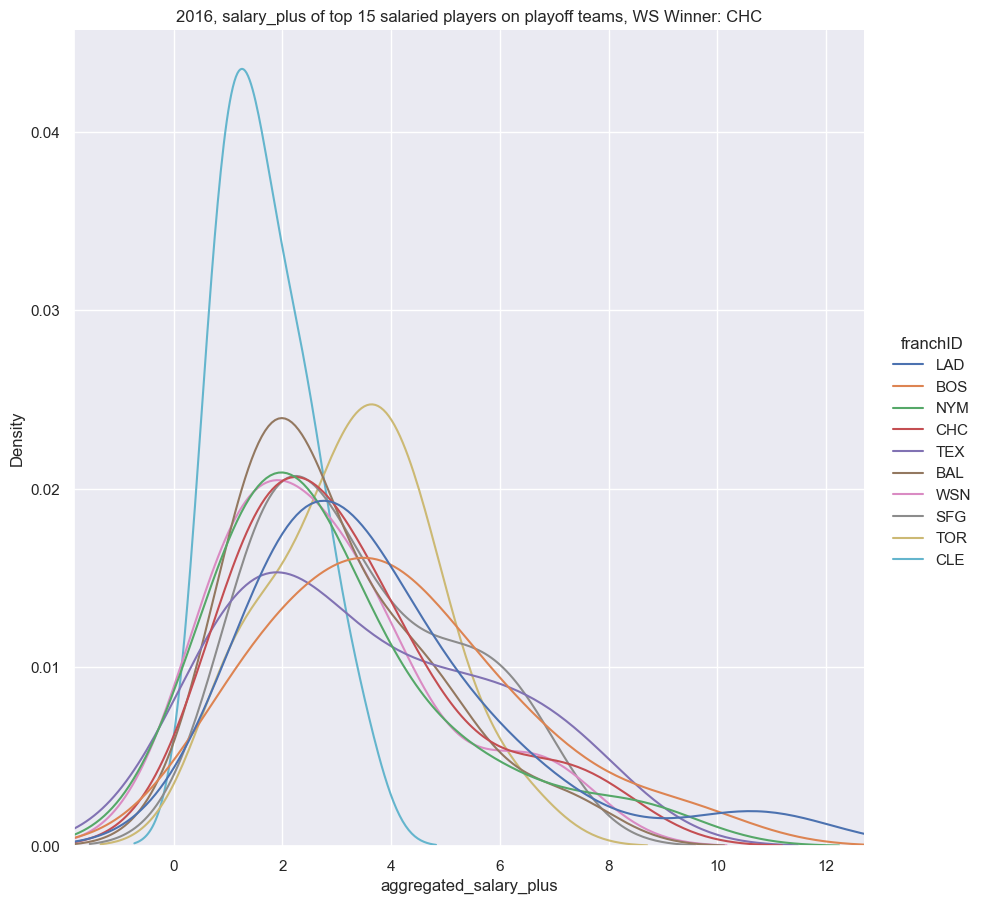

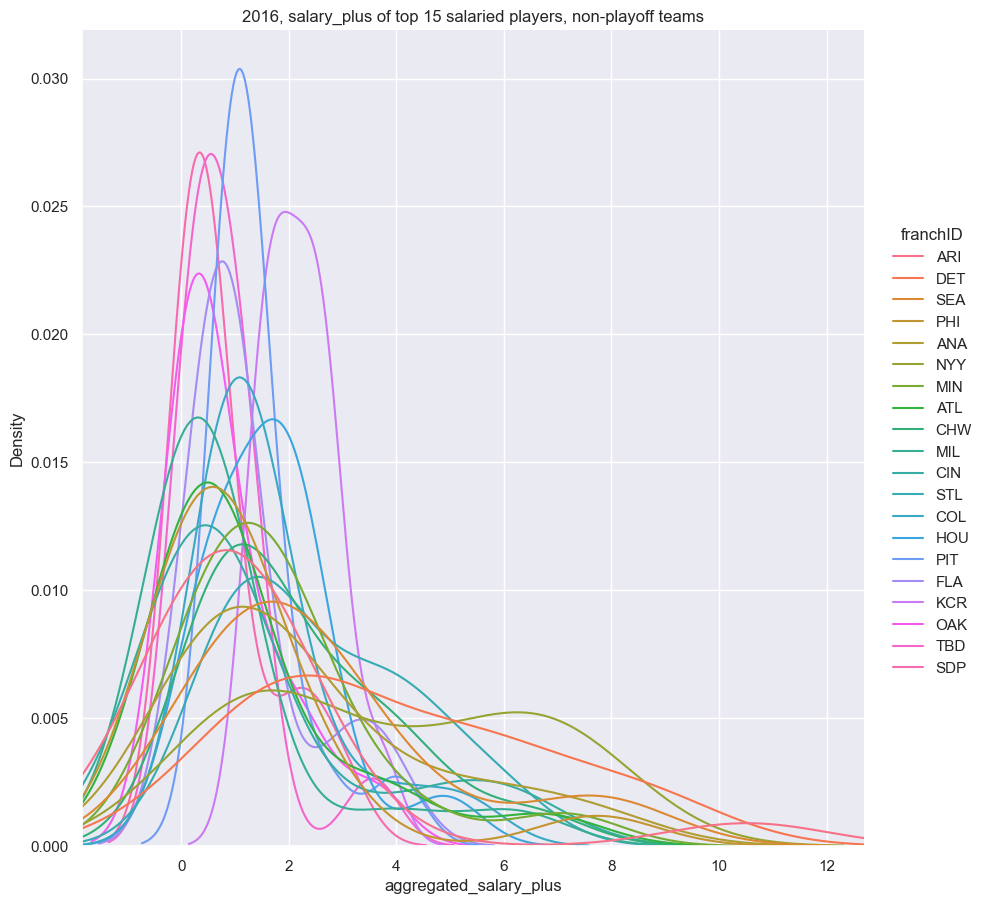

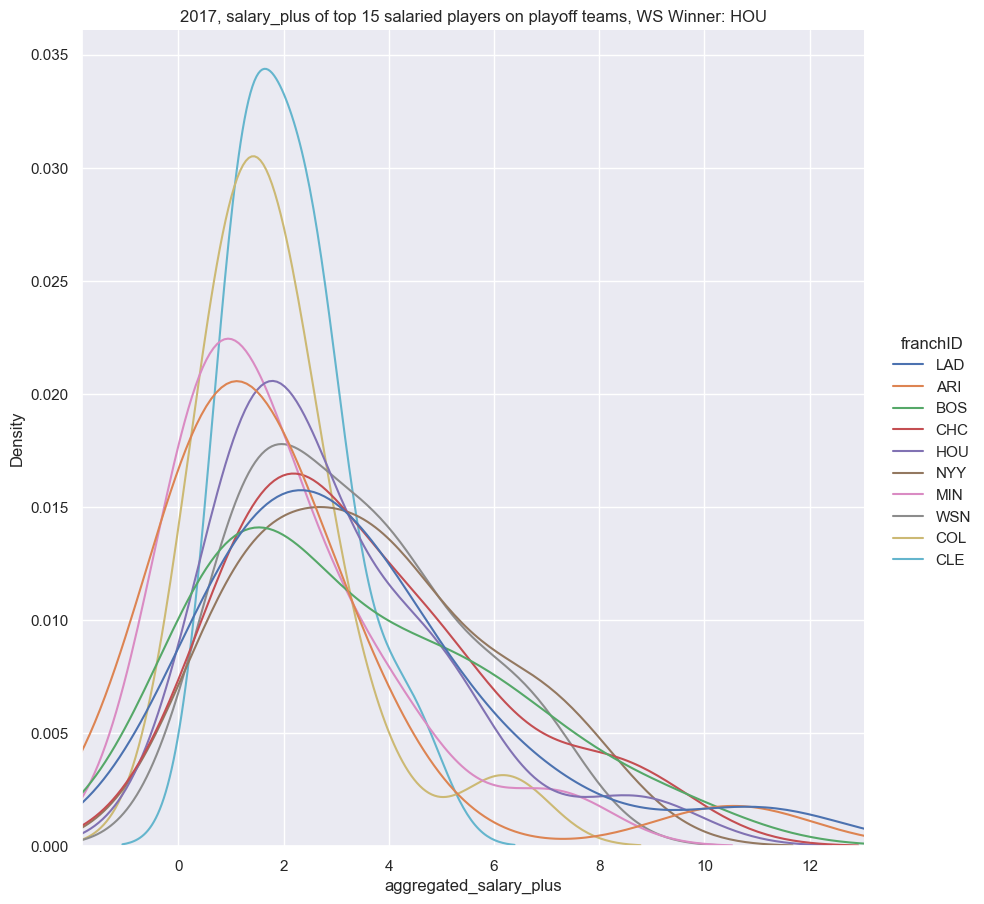

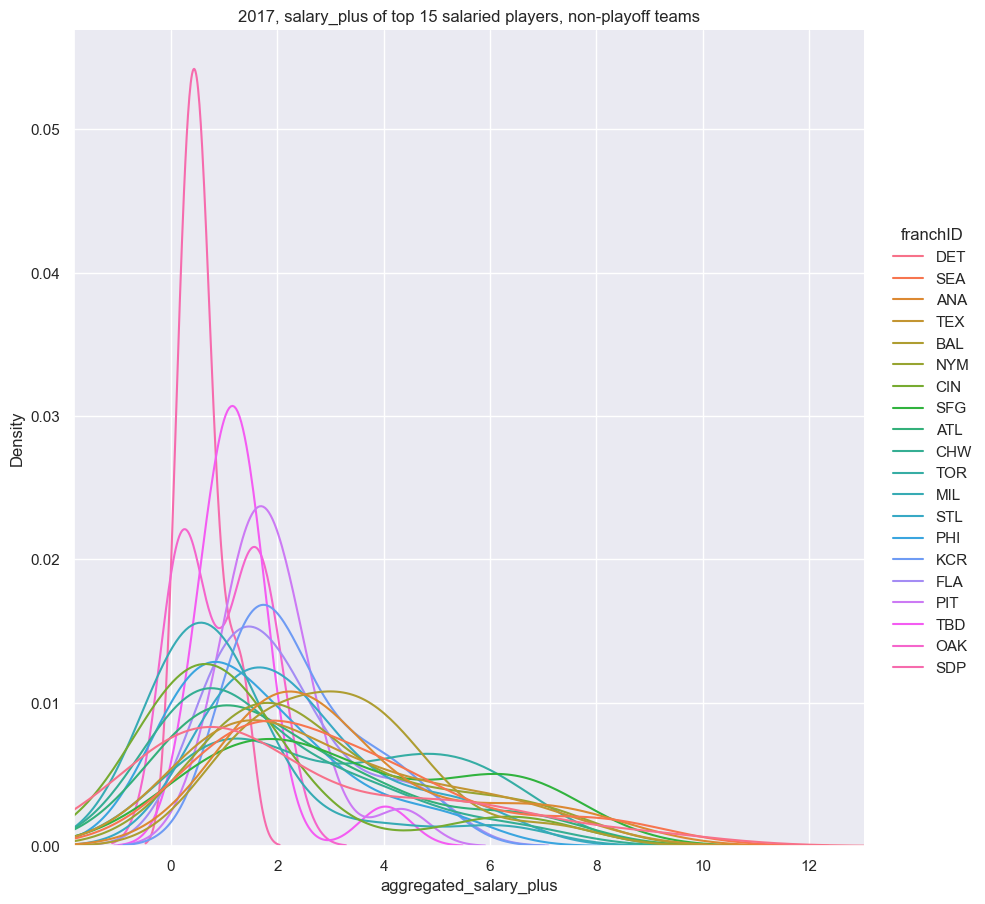

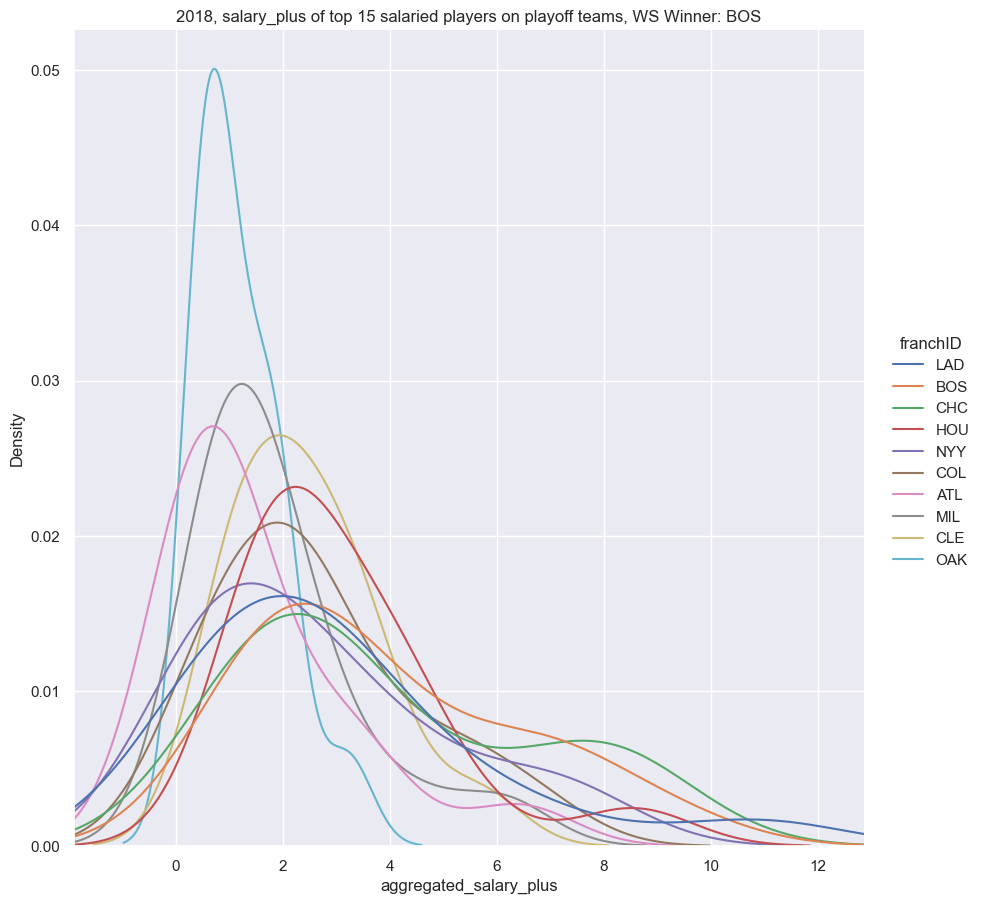

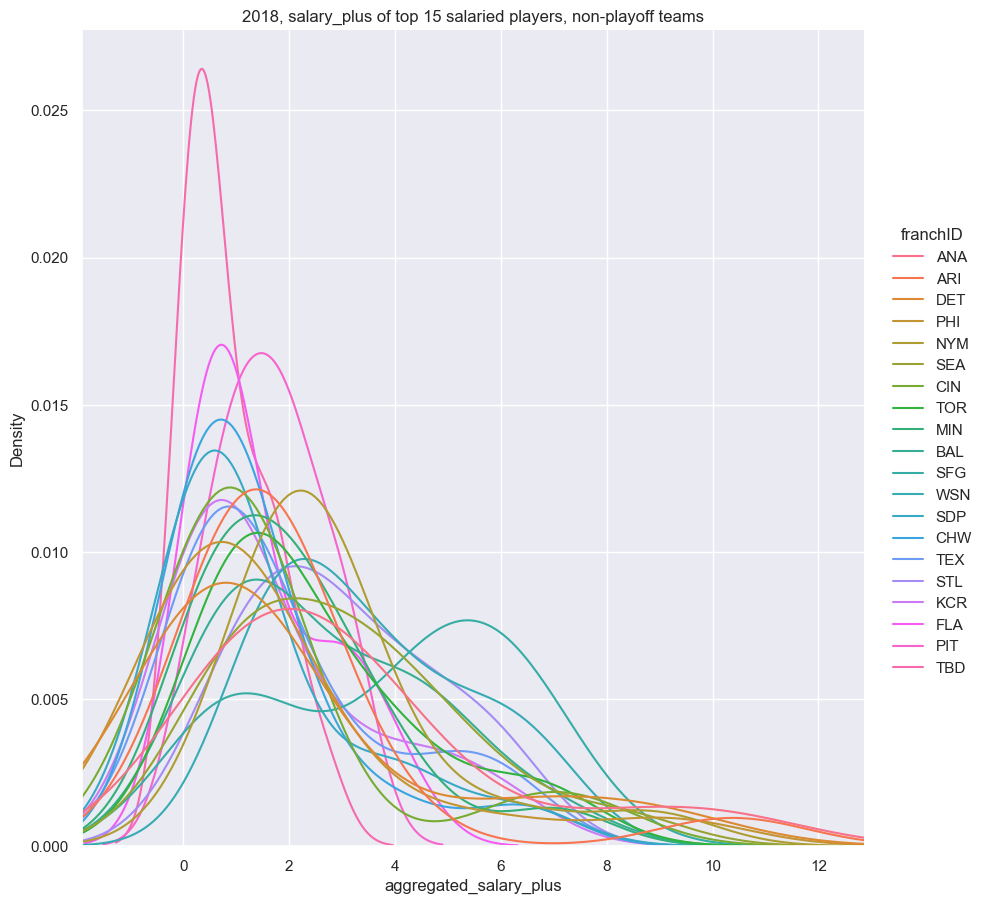

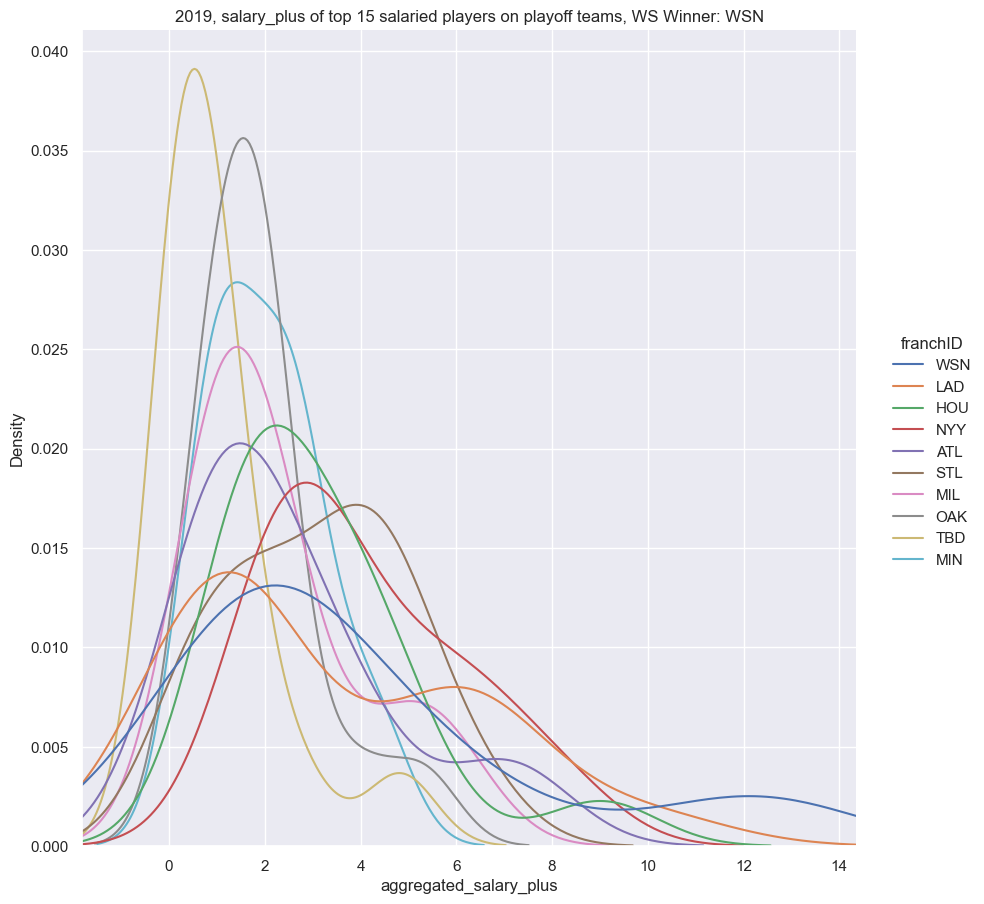

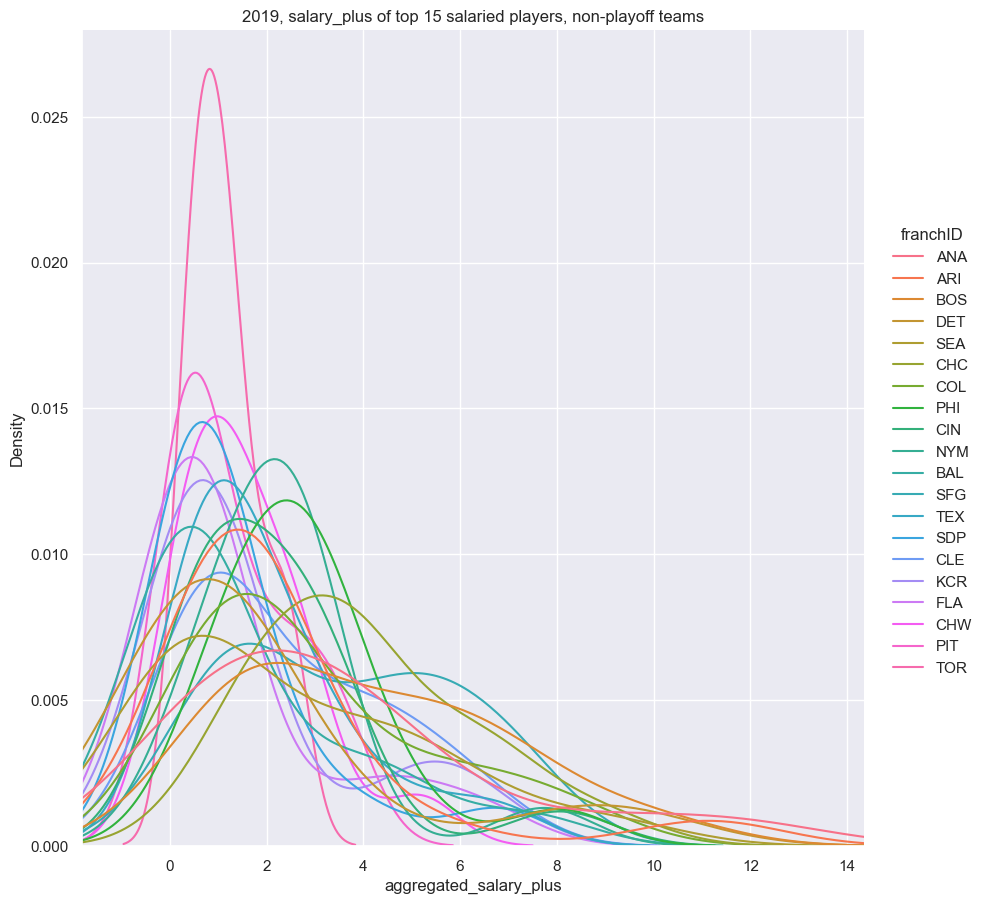

In [10]:
players_salary_sort = players.sort_values('salary_plus',ascending=False).groupby(['year_ID','franchID']).head(15)
for year in range(2003,2020):
    

    players_use = players_salary_sort[(players_salary_sort['playoffs'] == 'Y') & (players_salary_sort['year_ID'] == year)]
    players_use2 = players_salary_sort[(players_salary_sort['playoffs'] == 'N') & (players_salary_sort['year_ID'] == year)]

    xmax = max([max(players_use['aggregated_salary_plus']),max(players_use2['aggregated_salary_plus'])]) +2
    xmin = min([min(players_use['aggregated_salary_plus']),min(players_use2['aggregated_salary_plus'])]) -2


    WSWinner = teams[(teams['year_ID'] == year) & (teams['WSWin'] == 'Y')].reset_index()['franchID'][0]

    sns.displot(x=players_use['aggregated_salary_plus']
                ,hue=players_use['franchID']
                ,kind='kde'
                ,height=9
                ).set(title=f'{year}, salary_plus of top 15 salaried players on playoff teams, WS Winner: {WSWinner}', xlim=(xmin,xmax))

    sns.displot(x=players_use2['aggregated_salary_plus']
                ,hue=players_use2['franchID']
                ,kind='kde'
                ,height=9
                ).set(title=f'{year}, salary_plus of top 15 salaried players, non-playoff teams', xlim=(xmin,xmax))
    

### Combined Team Salary Distributions

Broken into into the following groups:
* 95+ wins - Always makes the playoffs
* 89 to 94 wins - Often makes the playoffs
* 82 to 88 wins - Decent team missing playoffs
* 81 or fewer wins - Poor team


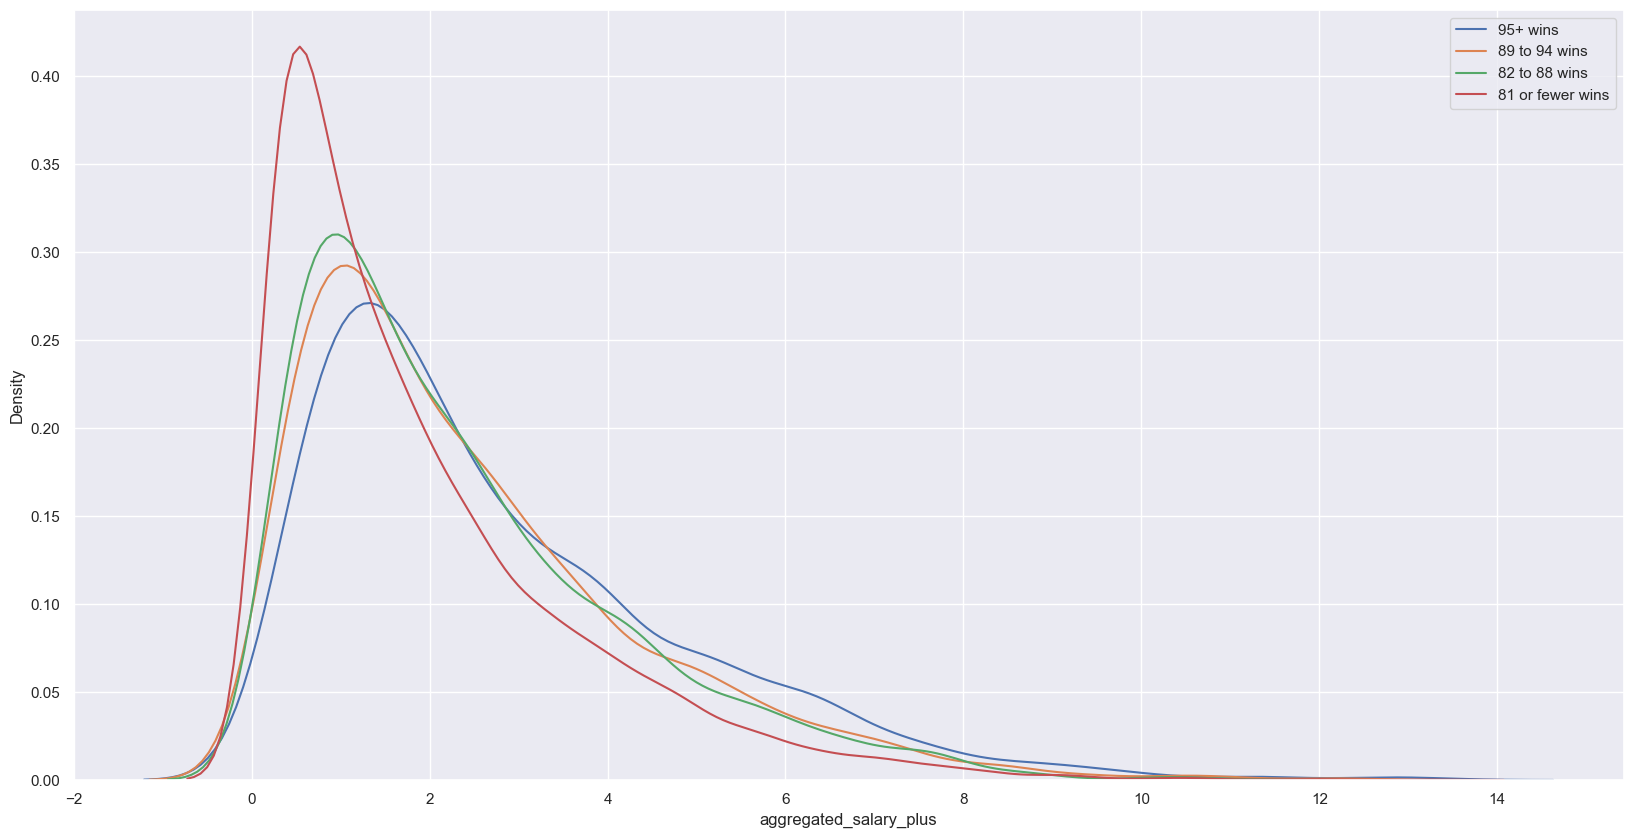

In [11]:
players = (
    teams.loc[
        :, ["year_ID", "franchID", "win_group"]]
    .merge(players, left_on=["year_ID", "franchID"], right_on=["year_ID", "franchID"],)
)

players_salary_sort = players.sort_values('salary_plus',ascending=False).groupby(['year_ID','franchID']).head(15)
players_use = players_salary_sort

sns.kdeplot(x=players_use[players_use['win_group']=="below117"]['aggregated_salary_plus']
            ,label="95+ wins")
sns.kdeplot(x=players_use[players_use['win_group']=="below95"]['aggregated_salary_plus']
            ,label="89 to 94 wins")
sns.kdeplot(x=players_use[players_use['win_group']=="below89"]['aggregated_salary_plus']
            ,label="82 to 88 wins")
sns.kdeplot(x=players_use[players_use['win_group']=="below82"]['aggregated_salary_plus']
            ,label="81 or fewer wins")
plt.legend()
#plt.title()

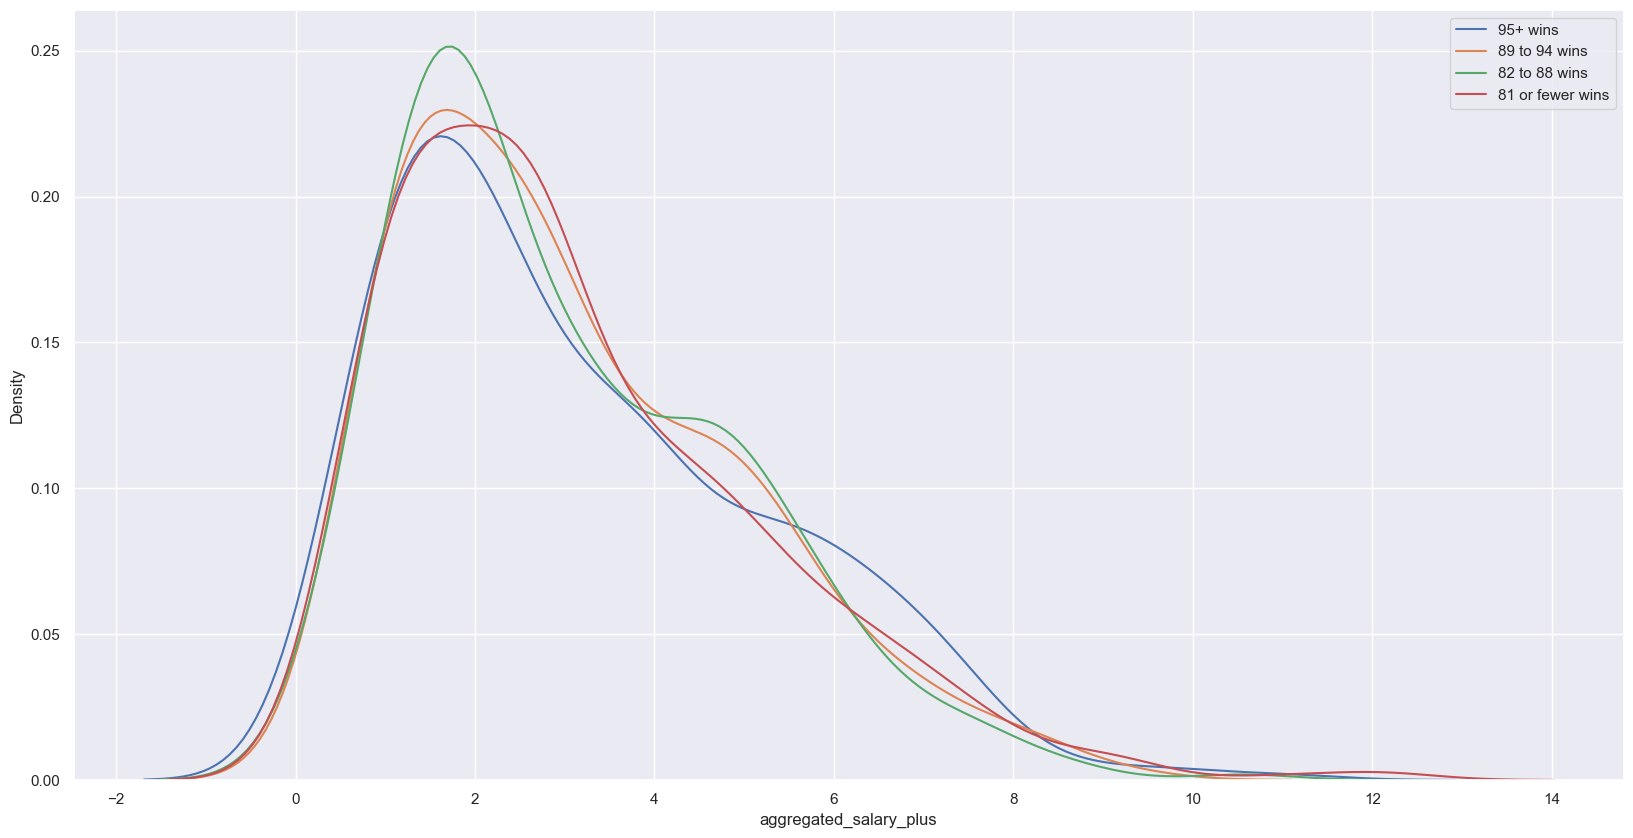

In [12]:
franch_use = teams[(teams['aggregated_salary_plus']>1.3) & (teams['aggregated_salary_plus']<1.5)][['franchID','year_ID']]
players_use = players_salary_sort.merge(franch_use, left_on=["year_ID", "franchID"], right_on=["year_ID", "franchID"])
sns.kdeplot(x=players_use[players_use['win_group']=="below117"]['aggregated_salary_plus']
            ,label="95+ wins")
sns.kdeplot(x=players_use[players_use['win_group']=="below95"]['aggregated_salary_plus']
            ,label="89 to 94 wins")
sns.kdeplot(x=players_use[players_use['win_group']=="below89"]['aggregated_salary_plus']
            ,label="82 to 88 wins")
sns.kdeplot(x=players_use[players_use['win_group']=="below82"]['aggregated_salary_plus']
            ,label="81 or fewer wins")
plt.legend()

### Player Ordered Team Salary Distributions

Here is a method for showing differences between each teams top paid players. Rather than taking a holistic view, this method shows minute differences in how much teams are paying their players. 

Here I've shown just the 2012 AL West as an example, and then a combined plot for all playoff/non-playoff teams. The former shows a fine level of detail, to be able to see for instance how the Angels (ANA) paid their top 7 players particularly higher than the rest of the division, but their 18th and worse paid players made less than the Rangers (TEX), who overpreformed them by 4 wins. The latter plot shows that on a larger scale, there are not anomalies in player payment, and teams that make the playoffs pay their players more on all induvidual rankings.

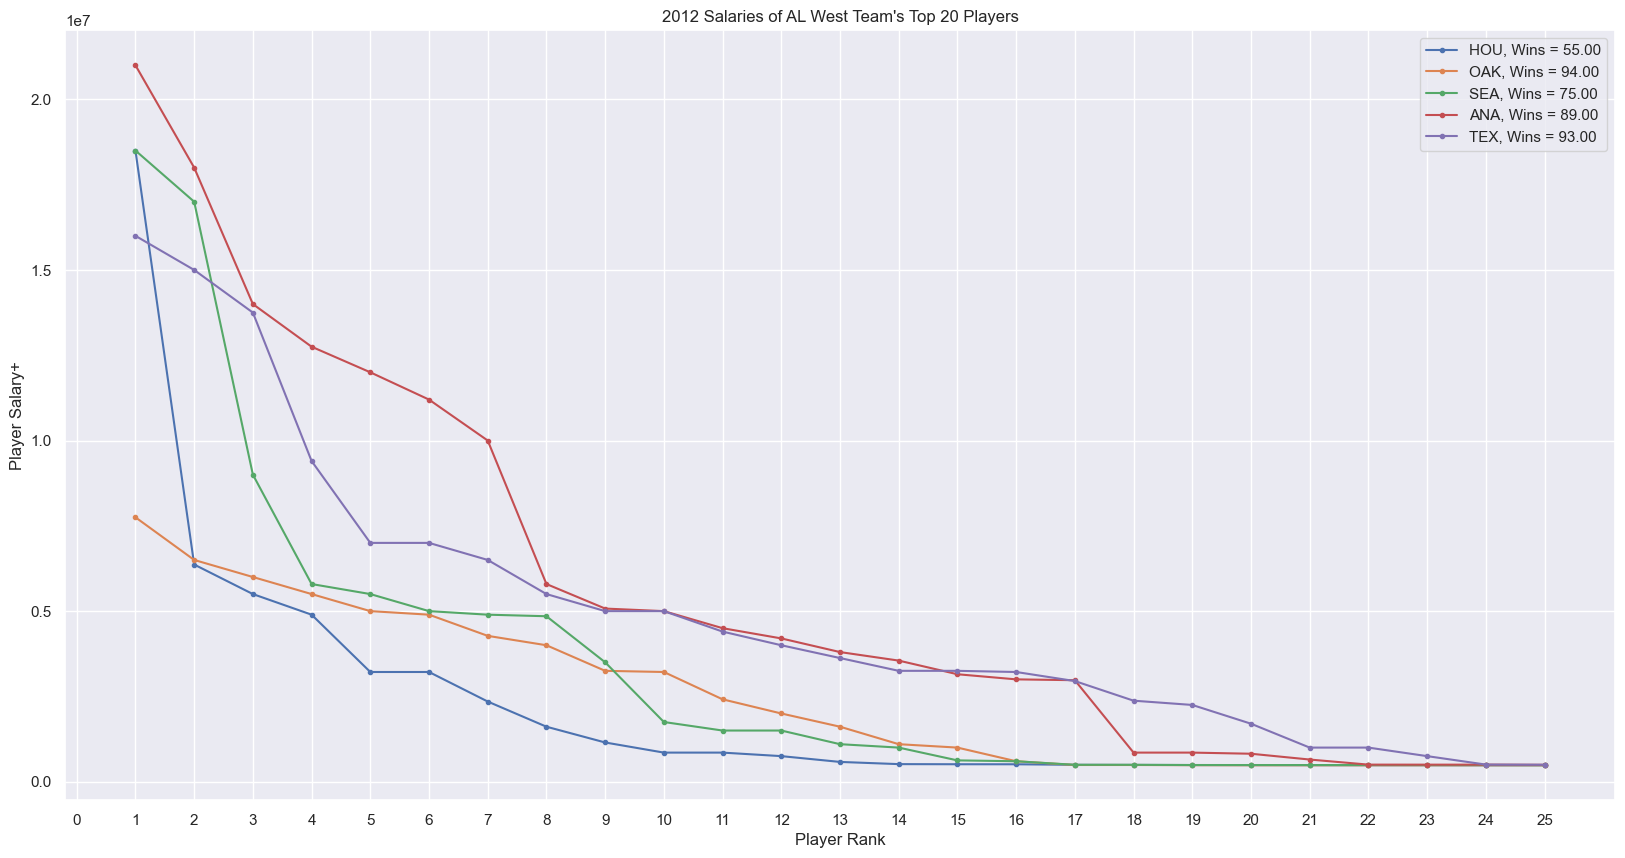

In [13]:
fig, ax = plt.subplots()

AL_West = ['HOU','OAK','SEA','ANA','TEX']
for team in AL_West:
    year = 2012

    team_df = players[(players['year_ID']==year) & (players['franchID']==team)].sort_values(['franchID','year_ID','team_salary_rank']).head(25)
    team_wins = teams[(teams['year_ID']==year) & (teams['franchID']==team)]['W'].iloc[0] 
    plt.plot(team_df['team_salary_rank'],team_df['aggregated_salary'],marker='.',label=f'{team}, Wins = {team_wins:.2f}')

plt.title('2012 Salaries of AL West Team\'s Top 20 Players')
plt.xlabel('Player Rank')
plt.ylabel('Player Salary+')
plt.xticks(range(26))
ax.legend()

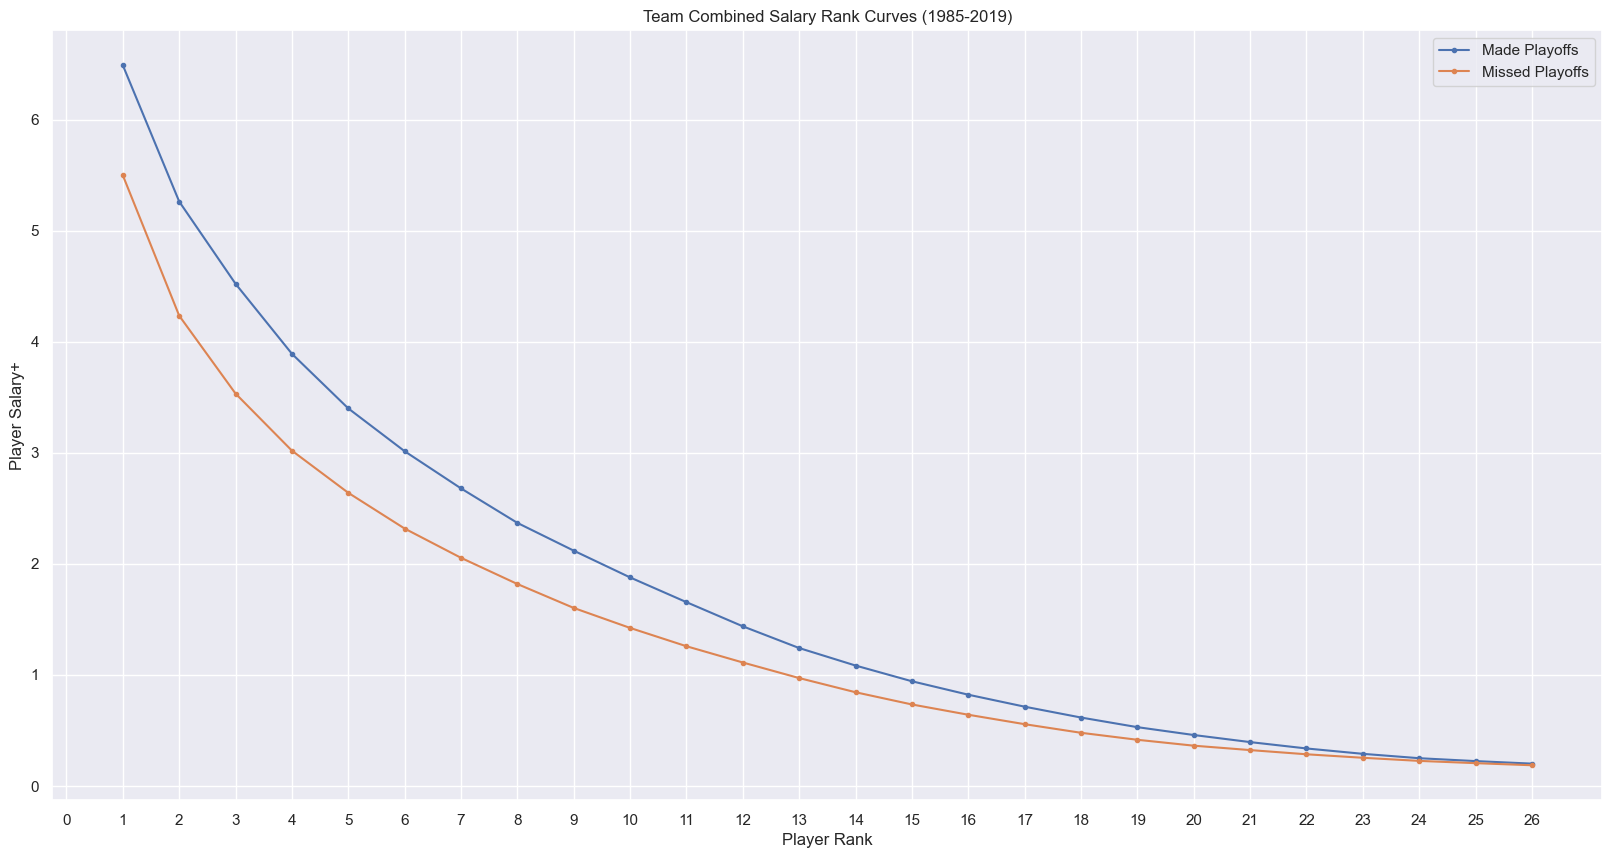

In [14]:
agg_ranks_playoffs = players[players['playoffs']=="Y"][['team_salary_rank','aggregated_salary_plus']].groupby('team_salary_rank').agg('mean').reset_index().head(26)
agg_ranks_miss = players[players['playoffs']=="N"][['team_salary_rank','aggregated_salary_plus']].groupby('team_salary_rank').agg('mean').reset_index().head(26)

fig, ax = plt.subplots()
plt.plot(agg_ranks_playoffs['team_salary_rank'],agg_ranks_playoffs['aggregated_salary_plus'],marker='.',label="Made Playoffs")
plt.plot(agg_ranks_miss['team_salary_rank'],agg_ranks_miss['aggregated_salary_plus'],marker='.',label="Missed Playoffs")

plt.title('Team Combined Salary Rank Curves (1985-2019)')
plt.xlabel('Player Rank')
plt.ylabel('Player Salary+')
plt.xticks(range(27))
ax.legend()


In [15]:
agg_ranks = players[['win_group','team_salary_rank','aggregated_salary_plus']].groupby(['team_salary_rank','win_group']).agg('mean').reset_index().head(104)


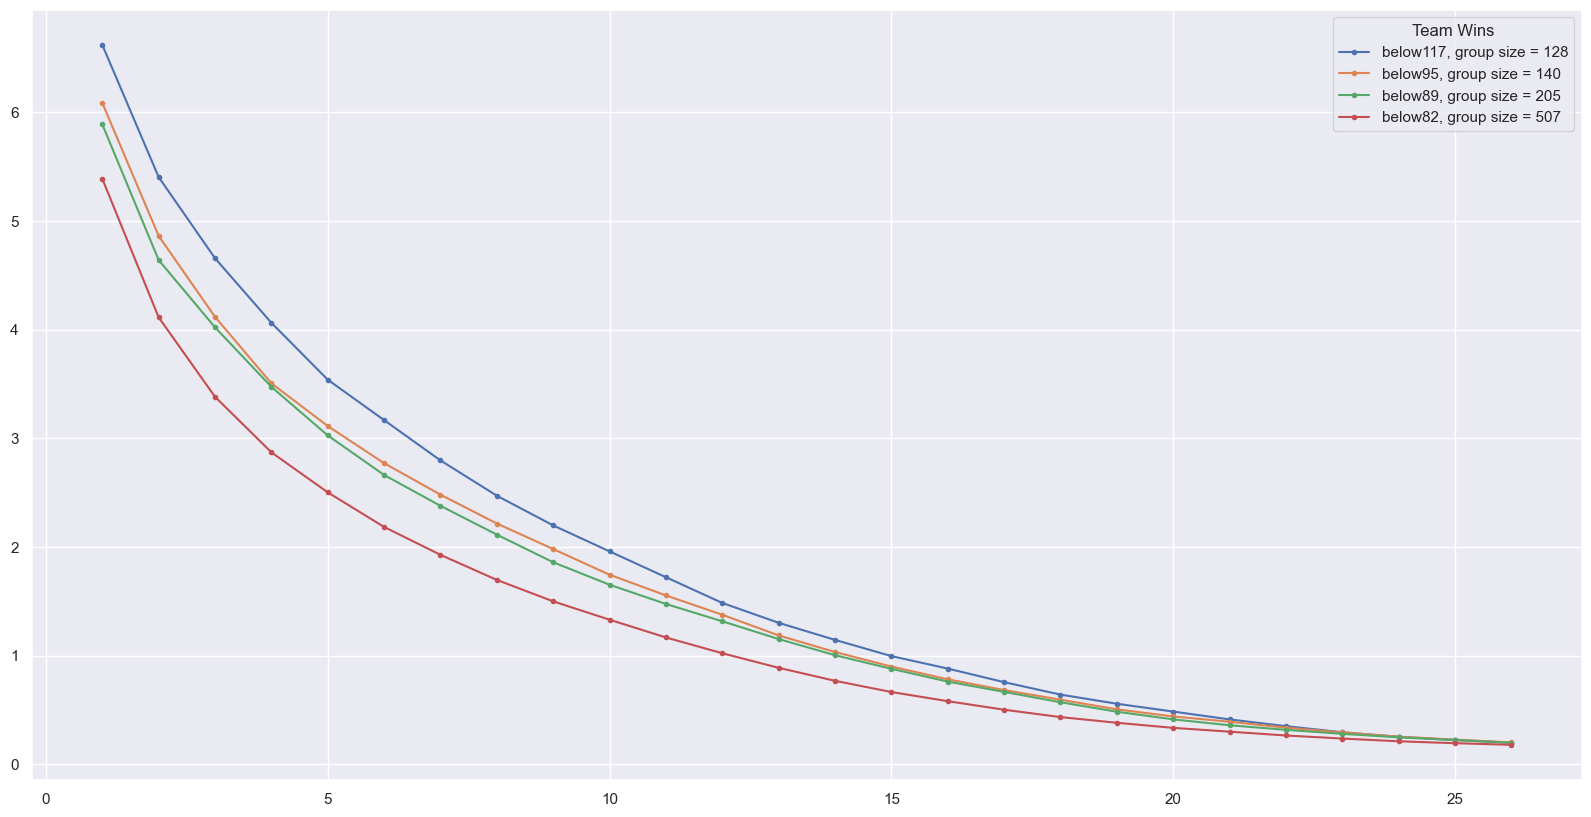

In [16]:
for idx,group in enumerate(['below117', 'below95', 'below89', 'below82']):

    group_size = len(teams[teams['win_group']==group])
    rank_group = agg_ranks[agg_ranks['win_group'] == group]
    plt.plot(agg_ranks[agg_ranks['win_group']==group]['team_salary_rank'],agg_ranks[agg_ranks['win_group']==group]['aggregated_salary_plus'],marker='.',label=f'{group}, group size = {group_size}')

plt.legend(title='Team Wins')


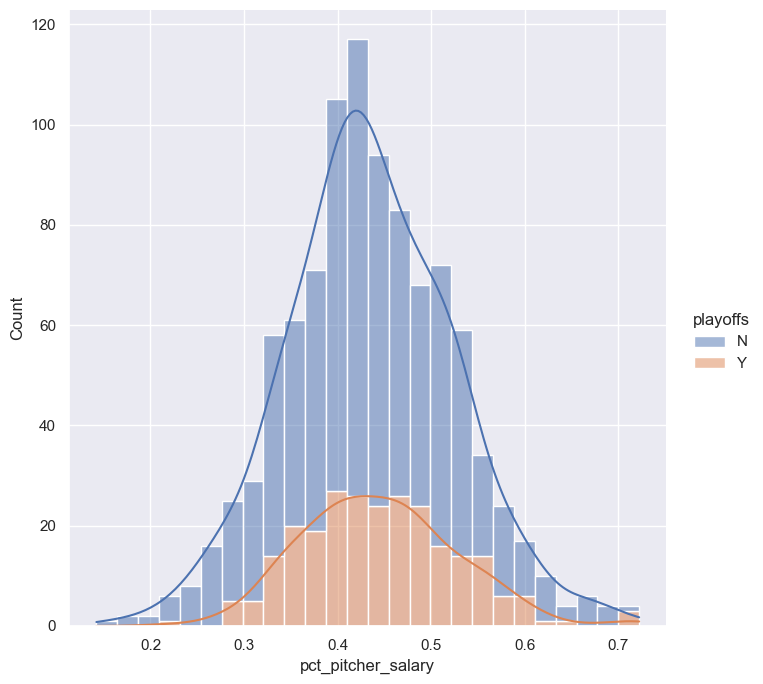

In [17]:
sns.displot(x=teams['pct_pitcher_salary'],hue=teams['playoffs']
            ,multiple='stack'
            , kde = True
            , height=7
            )

In [18]:
top_paid_pitchers = players[(players['pitcher']=="Y") & (players['team_position_salary_rank'] < 6)]
top_paid_fielders = players[(players['pitcher']=="N") & (players['team_position_salary_rank'] < 10)]


top_paid_pitchers_agg = top_paid_pitchers[['year_ID','franchID','aggregated_salary','WAR_total']].groupby(by=['year_ID','franchID']).agg('sum').reset_index()
top_paid_pitchers_agg.rename(columns={'WAR_total':'top_pitcher_WAR','aggregated_salary':'top_pitcher_salary'},inplace=True)
top_paid_fielders_agg = top_paid_fielders[['year_ID','franchID','aggregated_salary','WAR_total']].groupby(by=['year_ID','franchID']).agg('sum').reset_index()
top_paid_fielders_agg.rename(columns={'WAR_total':'top_fielder_WAR','aggregated_salary':'top_fielder_salary'},inplace=True)

top_positional_salary = top_paid_pitchers_agg.merge(top_paid_fielders_agg,on=['year_ID','franchID'])

avg = (
    top_positional_salary[["year_ID", "top_pitcher_salary","top_fielder_salary"]]
    .groupby("year_ID")
    .agg(["mean", np.std, np.median])
    .reset_index()
)

teams = teams.merge(top_positional_salary,on=['year_ID','franchID'])


C:\Users\sithl\AppData\Local\Temp\ipykernel_14208\3140970396.py:15: FutureWarning: The provided callable <function std at 0x000001AE7150A8E0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  .agg(["mean", np.std, np.median])
C:\Users\sithl\AppData\Local\Temp\ipykernel_14208\3140970396.py:15: FutureWarning: The provided callable <function median at 0x000001AE716632E0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg(["mean", np.std, np.median])


In [19]:
top_pitcher_salary_plus = []
top_fielder_salary_plus = []
for i in range(len(teams)):
    top_pitcher_salary_plus.append(
        teams["top_pitcher_salary"][i]
        / float(
            np.mean(teams[teams["year_ID"] == teams["year_ID"][i]]["top_pitcher_salary"])
        )
    )
    top_fielder_salary_plus.append(
            teams["top_fielder_salary"][i]
            / float(
                np.mean(teams[teams["year_ID"] == teams["year_ID"][i]]["top_fielder_salary"])
            )
        )
    
teams['top_pitcher_salary_plus'] = top_pitcher_salary_plus
teams['top_fielder_salary_plus'] = top_fielder_salary_plus

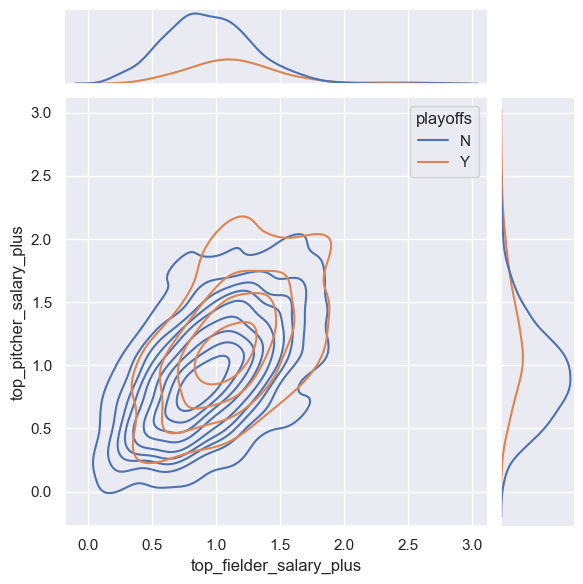

In [20]:
sns.jointplot(data = teams, x = 'top_fielder_salary_plus', y = 'top_pitcher_salary_plus', hue='playoffs', kind='kde')